# EDA Assignment - Bank Loan Defaulters

## Problem Statement

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. 
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## Datasets Used for EDA

Following are the two datasets used for which EDA has been carried out: 

 

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

## Analysis Approach

#### Step 1: Data Sourcing
    
- Load the application data set.

#### Step 1: Data Cleaning
    
- Fixing rows and columns.
- Identifying the missing values and use appropriate method to deal with it (remove/impute).
- Identify the incorrect data types and fix it.
- Handling Outliers.
- Standardizing the values.

#### Step 2: Perform Univariate Analysis
    
- Univariate numerical analysis
- Correlation between numerical values
- Univariate Unordered categorical analysis
- Univariate Ordered categorical analysis

#### Step 3: Perform Bivariate Analysis

- Bivariate numeric - numeric analysis
- Bivariate numeric - categorical analysis
- Bivariate categorical - categorical analysis
- Step 4: Perform Multivariate analysis 

#### Step 5: Data analysis of previous application dataset.

#### Step 6: Merging of both the data frames and providing the insights.

#### Step 7: Conclusion.

      
    

### Import the Libraries

In [2]:
# Import Warnings

import warnings
warnings.filterwarnings("ignore")


In [3]:
# Import the required Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
import plotly.express as px

### Read the Data sets

In [4]:
# The below options are used to display all the rows and columns.

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

In [156]:
# Read the application_data csv file using the pandas read_csv function.

ApplData=pd.read_csv("application_data.csv")

#### To find the number of rows and columns

In [157]:
ApplData.shape

(307511, 122)

In [158]:
# Print the first 5 rows (head) of the dataframe

ApplData.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

#### Summary statistics of the numerical values present in the dataset

There are 106 Numerical columns and 16 Categorical columns

In [159]:
ApplData.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [160]:
ApplData.describe().shape

(8, 106)

#### To find the datatypes of all the columns

In [161]:
ApplData.info(verbose=True) # verbose=True will give all information about all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## Data Cleaning

### Handling Missing Values

#### To find the number of null values in all the columns

In [162]:
ApplData.isnull().sum().sort_values(ascending=False)


COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

#### To find the percentage of missing values in all columns

In [163]:
mean_nulls=(ApplData.isnull().mean()*100).sort_values(ascending = False)
mean_nulls

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [164]:
mean_nulls[mean_nulls>0].count()

67

There are 67 columns for which the percentage of null values are greater than zero

In [165]:
mean_nulls[mean_nulls>40].count()

49

There are 49 columns out of 67 columns whose percentage of null values are greater than 40%.

#### Drop the columns with more number of null values




The 49 columns can be dropped as the percentage of null values are more than 40% and the columns with more number of null values are of no use to be retained in the data set.

In [167]:
# Drop all columns with more than 40% null values and copy in New_ApplData dataframe

New_ApplData = ApplData.loc[:,ApplData.isnull().mean()*100<=40]
New_ApplData.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [168]:

# To find the shape of the new dataframe after dropping the 49 columns.

New_ApplData.shape

(307511, 73)

In [169]:
# To find the sum of the null values for the new dataframe.

sum_null=New_ApplData.isnull().sum()
sum_null[sum_null.values>0]

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [170]:
# Number of columns having null values greater than 0.

sum_null[sum_null.values>0].count()

18

In [171]:
# Percentage of null values present in each column in new dataframe

new_null=New_ApplData.isnull().mean()*100

In [172]:
# Columns with null values after dropping the 49 columns.

new_null=new_null[new_null.values>0]
new_null

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [173]:
new_null[new_null.values>0].count()

18

There are 18 columns whose missing values are greater than 0 and less than 31 percentage for which the missing values has to be handled. 

## Missing Value Imputation

### Missing Value Imputation in Continuous columns

In [174]:
cont_cols=["AMT_ANNUITY","AMT_GOODS_PRICE","CNT_FAM_MEMBERS","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
len(cont_cols)

14

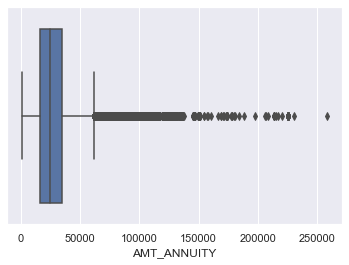

In [175]:
# Plotting boxplots to check for outliers.

sns.boxplot(New_ApplData["AMT_ANNUITY"])
plt.show()

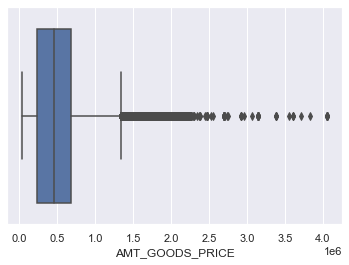

In [176]:
sns.boxplot(New_ApplData['AMT_GOODS_PRICE'])
plt.show()

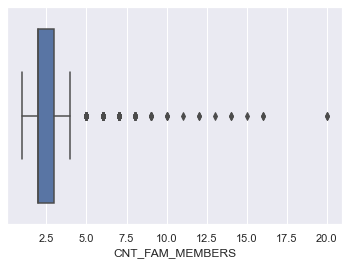

In [177]:
sns.boxplot(New_ApplData['CNT_FAM_MEMBERS'])
plt.show()

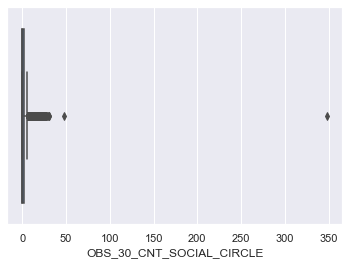

In [178]:
sns.boxplot(New_ApplData['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

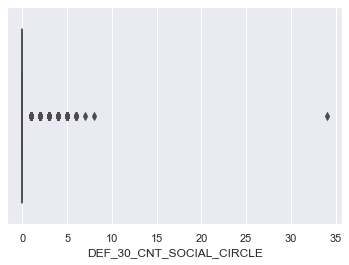

In [179]:
sns.boxplot(New_ApplData['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show()

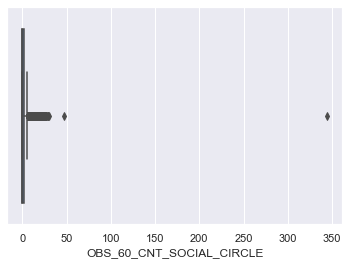

In [180]:
sns.boxplot(New_ApplData['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()

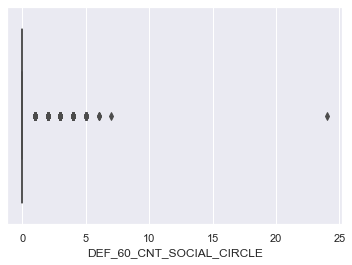

In [181]:
sns.boxplot(New_ApplData['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()

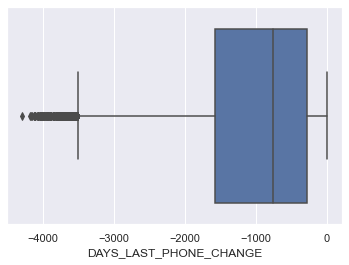

In [182]:
sns.boxplot(New_ApplData['DAYS_LAST_PHONE_CHANGE'])
plt.show()

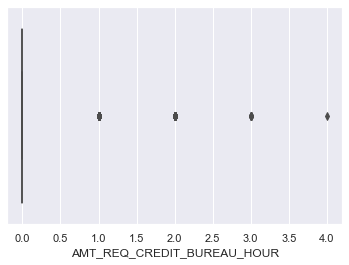

In [183]:
sns.boxplot(New_ApplData['AMT_REQ_CREDIT_BUREAU_HOUR'])
plt.show()

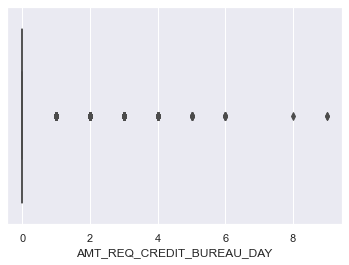

In [184]:
sns.boxplot(New_ApplData['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

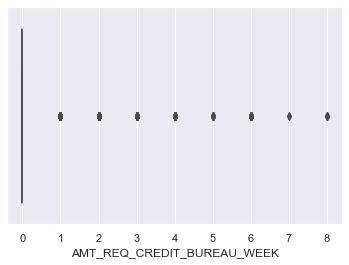

In [185]:
sns.boxplot(New_ApplData['AMT_REQ_CREDIT_BUREAU_WEEK'])
plt.show()

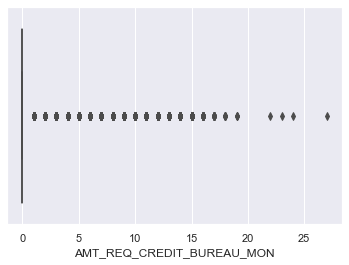

In [186]:
sns.boxplot(New_ApplData['AMT_REQ_CREDIT_BUREAU_MON'])
plt.show()

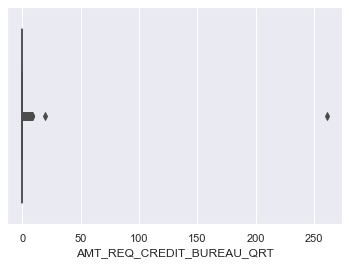

In [187]:
sns.boxplot(New_ApplData['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

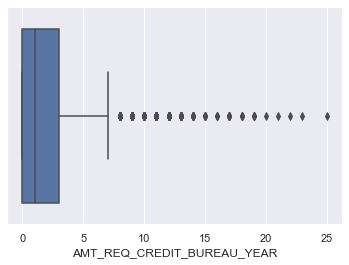

In [188]:
sns.boxplot(New_ApplData['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

The above 14 continuous columns are imputed with median in place of missing values as there are outliers present when a boxplot is plotted.


In [189]:
cont_cols=["AMT_ANNUITY","AMT_GOODS_PRICE","CNT_FAM_MEMBERS","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
for i in cont_cols:
    median=New_ApplData[i].median()
    New_ApplData[i].fillna(median,inplace=True)

#### For the below two columns the missing values are imputed with mean as there are no outliers when a boxplot is plotted.

- EXT_SOURCE_2
- EXT_SOURCE_3


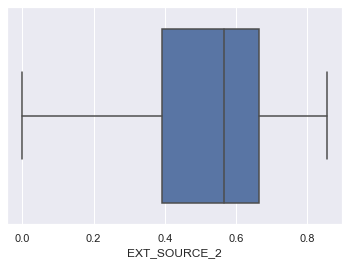

In [190]:
sns.boxplot(New_ApplData['EXT_SOURCE_2'])
plt.show()

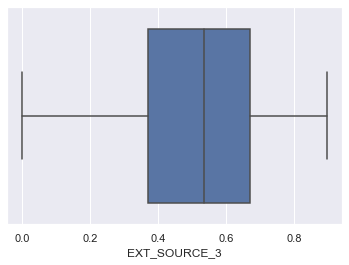

In [191]:
sns.boxplot(New_ApplData['EXT_SOURCE_3'])
plt.show()

In [192]:
New_ApplData.EXT_SOURCE_2.fillna(New_ApplData.EXT_SOURCE_2.mean(), inplace = True)
New_ApplData.EXT_SOURCE_3.fillna(New_ApplData.EXT_SOURCE_3.mean(), inplace=True)

In [193]:
sum_null=New_ApplData.isnull().sum()
sum_null[sum_null.values>0]

NAME_TYPE_SUITE     1292
OCCUPATION_TYPE    96391
dtype: int64

### Missing Value Imputation in Categorical columns

#### The following two columns are categorical columns and hence the missing values are imputed with mode value. 

- NAME_TYPE_SUITE
- OCCUPATION_TYPE

In [194]:
New_ApplData.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [195]:
New_ApplData.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [196]:
new_VAL = New_ApplData['NAME_TYPE_SUITE'].mode()[0]
new_VAL

'Unaccompanied'

In [197]:
new_VAL = New_ApplData['OCCUPATION_TYPE'].mode()[0]
new_VAL

'Laborers'

In [198]:
New_ApplData.NAME_TYPE_SUITE.fillna(New_ApplData.NAME_TYPE_SUITE.mode()[0], inplace=True)
New_ApplData.OCCUPATION_TYPE.fillna(New_ApplData.OCCUPATION_TYPE.mode()[0], inplace=True)

In [199]:
New_ApplData.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [200]:
sum_null=New_ApplData.isnull().sum()
sum_null[sum_null.values>0]

Series([], dtype: int64)

### Removing unwanted columns:

After imputing values for the columns having missing values we observe that there are few columns in the dataset that do not add any value for analysis. Hence these columns can be dropped.


In [201]:
New_ApplData.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [202]:
cols_unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
New_ApplData.drop(labels=cols_unwanted,axis=1,inplace=True)

In [203]:
New_ApplData.shape

(307511, 45)

In [204]:
New_ApplData.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [205]:
# Dropping the unknown rows

New_ApplData=New_ApplData[~(New_ApplData.NAME_FAMILY_STATUS=='Unknown')]
New_ApplData[(New_ApplData.NAME_FAMILY_STATUS=='Unknown')]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OCCUPATION_TYPE, CNT_FAM_MEMBERS, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

In [206]:
New_ApplData.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

### Standardize Values

- Handling Nagative Values
- Handling XNA values

### Handling Negative Values

There are columns which represents number of days but they are provided as negative value which is not correct. Hence below is the method to handle the negative values.

In [207]:
New_ApplData[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637            -3648.0            -2120   
1      -16765          -1188            -1186.0             -291   
2      -19046           -225            -4260.0            -2531   
3      -19005          -3039            -9833.0            -2437   
4      -19932          -3038            -4311.0            -3458   

   DAYS_LAST_PHONE_CHANGE  
0                 -1134.0  
1                  -828.0  
2                  -815.0  
3                  -617.0  
4                 -1106.0

In [208]:
DAYS_New_ApplData = [i for i in New_ApplData if i.startswith('DAYS')]
DAYS_New_ApplData

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [209]:
New_ApplData[DAYS_New_ApplData]=abs(New_ApplData[DAYS_New_ApplData])

In [210]:
New_ApplData[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637             3648.0             2120   
1       16765           1188             1186.0              291   
2       19046            225             4260.0             2531   
3       19005           3039             9833.0             2437   
4       19932           3038             4311.0             3458   

   DAYS_LAST_PHONE_CHANGE  
0                  1134.0  
1                   828.0  
2                   815.0  
3                   617.0  
4                  1106.0

### Handling XNA values:

In [211]:
New_ApplData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307509 non-null  int64  
 1   TARGET                       307509 non-null  int64  
 2   NAME_CONTRACT_TYPE           307509 non-null  object 
 3   CODE_GENDER                  307509 non-null  object 
 4   FLAG_OWN_CAR                 307509 non-null  object 
 5   FLAG_OWN_REALTY              307509 non-null  object 
 6   CNT_CHILDREN                 307509 non-null  int64  
 7   AMT_INCOME_TOTAL             307509 non-null  float64
 8   AMT_CREDIT                   307509 non-null  float64
 9   AMT_ANNUITY                  307509 non-null  float64
 10  AMT_GOODS_PRICE              307509 non-null  float64
 11  NAME_TYPE_SUITE              307509 non-null  object 
 12  NAME_INCOME_TYPE             307509 non-null  object 
 13 

#### By checking all the categorical columns we found that CODE_GENDER and ORGANIZATION_TYPE has XNA values. Lets update those values with appropriate values.

In [212]:
New_ApplData[New_ApplData['CODE_GENDER']=='XNA'].shape

(4, 45)

In [213]:
New_ApplData.CODE_GENDER.value_counts()

F      202447
M      105058
XNA         4
Name: CODE_GENDER, dtype: int64


As the female is majority, we can update XNA with "F" as it won't affect the dataset.

In [214]:
New_ApplData.loc[New_ApplData['CODE_GENDER']=='XNA','CODE_GENDER']='F'
New_ApplData['CODE_GENDER'].value_counts()

F    202451
M    105058
Name: CODE_GENDER, dtype: int64

In [215]:
New_ApplData.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [216]:
New_ApplData[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23                     XNA             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working

The pensioner value in column NAME_INCOME_TYPE is approximately equal to the null value in the column ORGANIZATION_TYPE. So the value is missing at Random.

In [217]:
New_ApplData['ORGANIZATION_TYPE'] = New_ApplData['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')

In [218]:
New_ApplData.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Pensioner                 55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

### Datatypes

The column with numeric values are in int and float datatype. So we need to handle only the object and have to change it to category type.

In [219]:
New_ApplData.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             2120        Laborers              1.0   
1              291      Core staff              2.0   
2             2531        Laborers              1.0   
3             2437        Laborers              2.0   
4             3458      Core staff              1.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Reli

In [220]:
New_ApplData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307509 non-null  int64  
 1   TARGET                       307509 non-null  int64  
 2   NAME_CONTRACT_TYPE           307509 non-null  object 
 3   CODE_GENDER                  307509 non-null  object 
 4   FLAG_OWN_CAR                 307509 non-null  object 
 5   FLAG_OWN_REALTY              307509 non-null  object 
 6   CNT_CHILDREN                 307509 non-null  int64  
 7   AMT_INCOME_TOTAL             307509 non-null  float64
 8   AMT_CREDIT                   307509 non-null  float64
 9   AMT_ANNUITY                  307509 non-null  float64
 10  AMT_GOODS_PRICE              307509 non-null  float64
 11  NAME_TYPE_SUITE              307509 non-null  object 
 12  NAME_INCOME_TYPE             307509 non-null  object 
 13 

In [221]:
obj_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for i in obj_cols:
    New_ApplData[i] = New_ApplData[i].astype('category')

In [222]:
New_ApplData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307509 non-null  int64   
 1   TARGET                       307509 non-null  int64   
 2   NAME_CONTRACT_TYPE           307509 non-null  category
 3   CODE_GENDER                  307509 non-null  category
 4   FLAG_OWN_CAR                 307509 non-null  category
 5   FLAG_OWN_REALTY              307509 non-null  category
 6   CNT_CHILDREN                 307509 non-null  int64   
 7   AMT_INCOME_TOTAL             307509 non-null  float64 
 8   AMT_CREDIT                   307509 non-null  float64 
 9   AMT_ANNUITY                  307509 non-null  float64 
 10  AMT_GOODS_PRICE              307509 non-null  float64 
 11  NAME_TYPE_SUITE              307509 non-null  category
 12  NAME_INCOME_TYPE             307509 non-null

### Handling Outliers

#### Identifying and treating the Outliers in Continuous columns

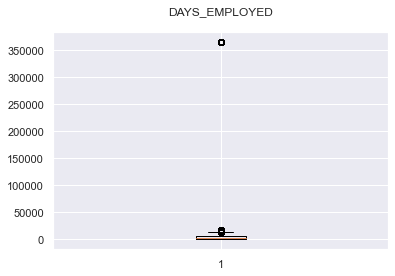

In [223]:
# 1.DAYS_EMPLOYED

plt.boxplot(New_ApplData['DAYS_EMPLOYED'])
plt.title('DAYS_EMPLOYED\n')
plt.show()


In [224]:
New_ApplData["DAYS_EMPLOYED"].describe()

count    307509.000000
mean      67725.178092
std      139444.100488
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [225]:
q1=933.000000 #(25th percentile)
q3=5707.000000 #(75th percentile)
iqr=q3-q1 #(Inter quartile range)
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound 

(-6228.0, 12868.0)

In [226]:
New_ApplData[New_ApplData["DAYS_EMPLOYED"]<lower_bound]["DAYS_EMPLOYED"]

Series([], Name: DAYS_EMPLOYED, dtype: int64)

In [227]:
New_ApplData[New_ApplData["DAYS_EMPLOYED"]>upper_bound]["DAYS_EMPLOYED"]

8         365243
11        365243
23        365243
38        365243
43        365243
46        365243
54        365243
56        365243
62        365243
79        365243
81        365243
84        365243
99        365243
105       365243
106       365243
108       365243
117       365243
118       365243
125       365243
140       365243
143       365243
156       365243
157       365243
158       365243
173       365243
174       365243
175       365243
185       365243
213       365243
220       365243
222       365243
226       365243
227       365243
233       365243
237       365243
239       365243
240       365243
247       365243
252       365243
263       365243
264        15632
270       365243
283       365243
287       365243
290       365243
302       365243
304       365243
305       365243
306       365243
318       365243
322       365243
324       365243
342       365243
344       365243
347       365243
348       365243
349       365243
352       365243
359       3652

We shall cap the outliers more than upper bound.

In [228]:
New_ApplData["DAYS_EMPLOYED"]=np.where(New_ApplData["DAYS_EMPLOYED"]>upper_bound,upper_bound,New_ApplData["DAYS_EMPLOYED"])

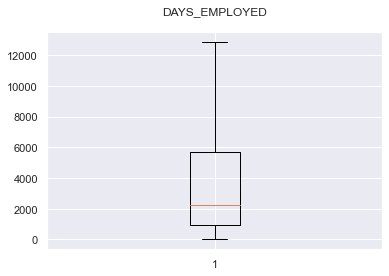

In [229]:
plt.boxplot(New_ApplData['DAYS_EMPLOYED'])
plt.title('DAYS_EMPLOYED\n')
plt.show()

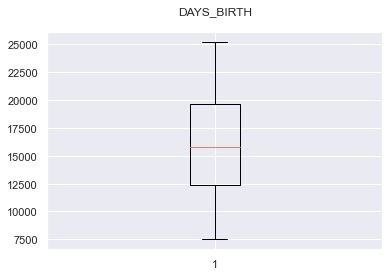

In [232]:
# DAYS_BIRTH

plt.boxplot(New_ApplData['DAYS_BIRTH'])
plt.title('DAYS_BIRTH\n')
plt.show()

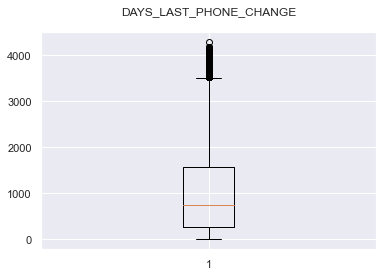

In [233]:
# DAYS_LAST_PHONE_CHANGE

plt.boxplot(New_ApplData['DAYS_LAST_PHONE_CHANGE'])
plt.title('DAYS_LAST_PHONE_CHANGE\n')
plt.show()

In [236]:
New_ApplData["DAYS_LAST_PHONE_CHANGE"].describe()

count    307509.000000
mean        962.859406
std         826.809712
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [241]:
q1=274.000000 #(25th percentile)
q3=1570.000000 #(75th percentile)
iqr=q3-q1 #(Inter quartile range)
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound 

(-1670.0, 3514.0)

In [242]:
New_ApplData[New_ApplData["DAYS_LAST_PHONE_CHANGE"]<lower_bound]["DAYS_LAST_PHONE_CHANGE"]



Series([], Name: DAYS_LAST_PHONE_CHANGE, dtype: float64)

In [243]:
New_ApplData[New_ApplData["DAYS_LAST_PHONE_CHANGE"]>upper_bound]["DAYS_LAST_PHONE_CHANGE"]

2847      3845.0
2972      3560.0
4533      3528.0
4660      3882.0
5599      3856.0
5756      3645.0
6449      3611.0
7377      3567.0
8033      3575.0
8516      3667.0
9061      3664.0
9255      3696.0
10266     3983.0
10730     3941.0
11580     3784.0
12707     3610.0
13390     3520.0
14739     3677.0
16126     3690.0
16299     3543.0
16566     3522.0
17192     3541.0
18185     3736.0
19784     3666.0
20050     3722.0
20543     3606.0
20905     3536.0
21485     3601.0
22077     3573.0
22577     3523.0
23041     3704.0
23094     3548.0
23156     3723.0
23557     3567.0
24392     3734.0
25435     3523.0
27566     3763.0
27967     3609.0
28793     3583.0
29762     3545.0
31605     3783.0
33019     3843.0
34652     3986.0
36582     3582.0
37196     3525.0
37504     3536.0
37694     3967.0
37715     3592.0
38695     3609.0
38761     3519.0
38820     3646.0
38926     3556.0
39045     3960.0
39056     3594.0
39929     3534.0
40190     3607.0
41182     3629.0
41452     3523.0
41726     3614

In [244]:
New_ApplData["DAYS_LAST_PHONE_CHANGE"]=np.where(New_ApplData["DAYS_LAST_PHONE_CHANGE"]>upper_bound,upper_bound,New_ApplData["DAYS_LAST_PHONE_CHANGE"])

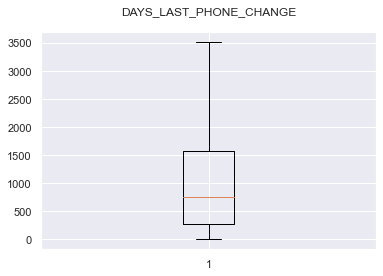

In [245]:
plt.boxplot(New_ApplData['DAYS_LAST_PHONE_CHANGE'])
plt.title('DAYS_LAST_PHONE_CHANGE\n')
plt.show()

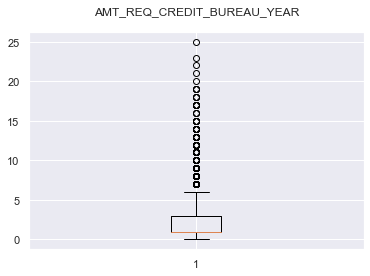

In [234]:
# AMT_REQ_CREDIT_BUREAU_YEAR

plt.boxplot(New_ApplData['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.title('AMT_REQ_CREDIT_BUREAU_YEAR\n')
plt.show() 

In [246]:
New_ApplData["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count    307509.000000
mean          1.778468
std           1.765528
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [247]:
q1=1.000000 #(25th percentile)
q3=3.000000 #(75th percentile)
iqr=q3-q1 #(Inter quartile range)
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
lower_bound,upper_bound 

(-2.0, 6.0)

In [248]:
New_ApplData[New_ApplData["AMT_REQ_CREDIT_BUREAU_YEAR"]<lower_bound]["AMT_REQ_CREDIT_BUREAU_YEAR"]

Series([], Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64)

In [249]:
New_ApplData[New_ApplData["AMT_REQ_CREDIT_BUREAU_YEAR"]>upper_bound]["AMT_REQ_CREDIT_BUREAU_YEAR"]

65         8.0
105        8.0
200        8.0
284        9.0
334        9.0
503        9.0
547        8.0
549        8.0
561        7.0
588        7.0
589        8.0
604        7.0
672        7.0
684        7.0
733        8.0
782        7.0
801        8.0
802        8.0
820        7.0
827        7.0
838        8.0
851        7.0
889        9.0
897        8.0
905        7.0
946        7.0
957        8.0
1010       9.0
1013       9.0
1097       7.0
1114       7.0
1226       8.0
1313       7.0
1357       7.0
1388       9.0
1411       8.0
1426       8.0
1460       9.0
1509       8.0
1511       9.0
1550       7.0
1604       7.0
1671       7.0
1724       7.0
1736       7.0
1756       8.0
1763       7.0
1789       9.0
1834       8.0
1892       7.0
1956       9.0
1961       7.0
1978       7.0
1987       8.0
2027      10.0
2155       7.0
2162       7.0
2229       7.0
2340       7.0
2365      11.0
2369       7.0
2372       7.0
2404       7.0
2442       7.0
2473       7.0
2518       9.0
2525      

In [250]:
New_ApplData["AMT_REQ_CREDIT_BUREAU_YEAR"]=np.where(New_ApplData["AMT_REQ_CREDIT_BUREAU_YEAR"]>upper_bound,upper_bound,New_ApplData["AMT_REQ_CREDIT_BUREAU_YEAR"])

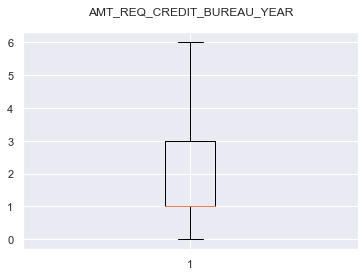

In [251]:
plt.boxplot(New_ApplData['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.title('AMT_REQ_CREDIT_BUREAU_YEAR\n')
plt.show()

In [252]:
New_ApplData.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461          637.0             3648.0   
1                    0.003541       16765         1188.0             1186.0   
2                    0.010032       19046          225.0             4260.0   
3                    0.008019       19005         3039.0             9833.0   
4                    0.028663       19932         3038.0             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             2120        Laborers              1.0   
1              291      Core staff              2.0   
2             2531        Laborers              1.0   
3             2437        Laborers              2.0   
4             3458      Core staff              1.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Reli

#### Binning the variables 

Binning the variables in the numerical column to get a Categorical  column

In [253]:
# Creating bins for income amount

New_ApplData["AMT_INCOME_TYPE"] = pd.qcut(New_ApplData.AMT_INCOME_TOTAL, q=[0,0.2,0.5,0.7,0.9,1], labels=["VERY LOW", "LOW","MEDIUM","HIGH","VERY HIGH"])

In [254]:
New_ApplData["AMT_INCOME_TYPE"].value_counts()

LOW          90089
HIGH         64765
VERY LOW     63671
MEDIUM       61824
VERY HIGH    27160
Name: AMT_INCOME_TYPE, dtype: int64

In [255]:
New_ApplData["AMT_INCOME_TYPE"].value_counts(normalize=True)*100

LOW          29.296378
HIGH         21.061172
VERY LOW     20.705410
MEDIUM       20.104777
VERY HIGH     8.832262
Name: AMT_INCOME_TYPE, dtype: float64

In [256]:
# Creating bins for credit amount

New_ApplData["AMT_CREDIT_TYPE"]=pd.qcut(New_ApplData.AMT_CREDIT, q=[0,0.2,0.5,0.7,0.9,1], labels=["VERY LOW", "LOW","MEDIUM","HIGH","VERY HIGH"])

In [257]:
New_ApplData["AMT_CREDIT_TYPE"].value_counts(normalize=True)*100

LOW          28.917528
VERY LOW     21.113203
MEDIUM       21.069302
HIGH         18.951315
VERY HIGH     9.948652
Name: AMT_CREDIT_TYPE, dtype: float64

In [258]:
New_ApplData['DAYS_BIRTH']= (New_ApplData['DAYS_BIRTH']/365).astype(int)    
New_ApplData['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [259]:
New_ApplData['AGE_GROUP']=pd.cut(New_ApplData['DAYS_BIRTH'],                 
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [260]:
New_ApplData[['DAYS_BIRTH','AGE_GROUP']].head(10)

DAYS_BIRTH   AGE_GROUP
0          25  Very_Young
1          45  Middle_Age
2          52  Middle_Age
3          52  Middle_Age
4          54  Middle_Age
5          46  Middle_Age
6          37  Middle_Age
7          51  Middle_Age
8          55  Middle_Age
9          39  Middle_Age

## Analysis:

Following are the analysis we are going to perform on the given data set:
    
- Imbalance analysis
- Univariate analysis
- Bivariate analysis

#### Imbalance analysis

In [261]:
# To check the Target imbalance percentage

New_ApplData["TARGET"].value_counts(normalize=True)*100

0    91.927066
1     8.072934
Name: TARGET, dtype: float64

The TARGET column has 8.07% of 1's which means there are 8.07% defaulters who have difficulty in paying the loan amount and 91.9% are non defaulters who does not have any difficulty in repaying the amount.

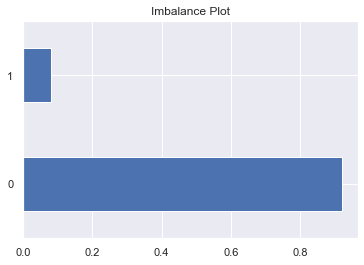

In [262]:
New_ApplData.TARGET.value_counts(normalize=True).plot.barh()
plt.title("Imbalance Plot")
plt.show()

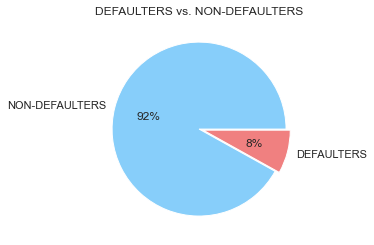

In [263]:
plt.pie(New_ApplData['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULTERS','DEFAULTERS'],explode=(0,0.05), autopct='%1.f%%', colors=["lightskyblue", "lightcoral"])
plt.title('DEFAULTERS vs. NON-DEFAULTERS')
plt.show()

In [264]:
# Let's divide the dataset into two dataset of  target = 1 (client with payment difficulties) and target = 0 (all other)

target1 = New_ApplData[New_ApplData['TARGET']==1]
target0 = New_ApplData[New_ApplData['TARGET']==0]

In [265]:
target1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801          25          637.0             3648.0   
26                    0.018029          51         2628.0             6573.0   
40                    0.025164          47         1262.0             1182.0   
42                    0.007305          36         3597.0               45.0   
81                    0.028663          67        12868.0             5391.0   

    DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0              2120        Laborers              1.0   
26             1827   Cooking staff              1.0   
40             1029        Laborers              2.0   
42             4409     Sales staff              2.0   
81             4199        Laborers              2.0   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                           0   
81                           0                           0   

    LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                             0                       0   
26                            0                       0   
40                            0                       0   
42                            0                       0   
81                            0                       0   

    REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                        0                        0  Business Entity Type 3   
26                       0                        0  Business Entity Type 3   
40                       0                        0  Business Entity Type 3   
42                       0                        0          

In [266]:
target0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541          45         1188.0             1186.0   
2                    0.010032          52          225.0             4260.0   
3                    0.008019          52         3039.0             9833.0   
4                    0.028663          54         3038.0             4311.0   
5                    0.035792          46         1588.0             4970.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1              291      Core staff              2.0   
2             2531        Laborers              1.0   
3             2437        Laborers              2.0   
4             3458      Core staff              1.0   
5              477        Laborers              2.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   
5                       0                        0              

In [267]:
round(len(target0)/len(target1),2)

11.39

The imbalance ratio is 11.39.

### Univariate Analysis:

The Univariate analysis can be done for the following type of variables.

- Categorical Unordered Analysis
- Categorical Ordered Analysis
- Numerical Analysis

In [268]:
# To find the categorical variables presentin the Dataset.

cat_col = list(New_ApplData.select_dtypes(include= 'category').columns) 

In [269]:
cat_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'AMT_INCOME_TYPE',
 'AMT_CREDIT_TYPE',
 'AGE_GROUP']

### Univariate Categorical Unordered Variables

In [270]:
# Function to plot the Categorical variables

def univariate_cat(var):
    plt.figure(figsize=(10,8)) 
    p1=sns.countplot(x=var, data=target0, palette = 'Set1', hue=var) 
    plt.xlabel(var, fontsize= 12)                                                        
    plt.ylabel('Total counts', fontsize= 12)
    plt.title('Non-DEFAULTERS', fontsize= 14)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=360, fontsize=10)
    plt.legend(fontsize=8)
    for p in p1.patches:
        p1.annotate('{:.1f}%'.format((p.get_height()/len(target0))*100), (p.get_x()+0.1, p.get_height()+50)) 
    
    
    plt.figure(figsize=(10,8)) 
    p2=sns.countplot(x=var, data=target1, palette = 'Set1', hue=var)                                          
    plt.xlabel(var, fontsize= 12)
    plt.ylabel('Total counts', fontsize= 12)
    plt.title('DEFAULTERS', fontsize= 12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=360, fontsize=10)
    plt.legend(fontsize=8)
    for p in p2.patches:
        p2.annotate('{:.1f}%'.format((p.get_height()/len(target1))*100), (p.get_x()+0.1, p.get_height()+50)) 
   
    plt.tight_layout(pad=3.0)
    plt.show()

The following variables are categorized as Univariate Categorical Unordered variables.

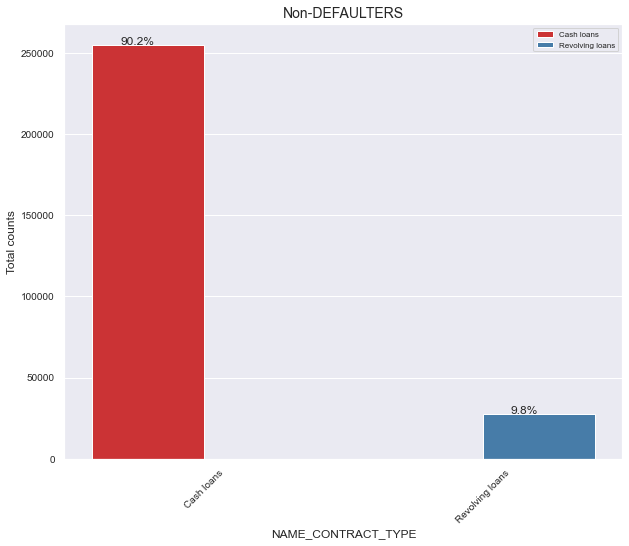

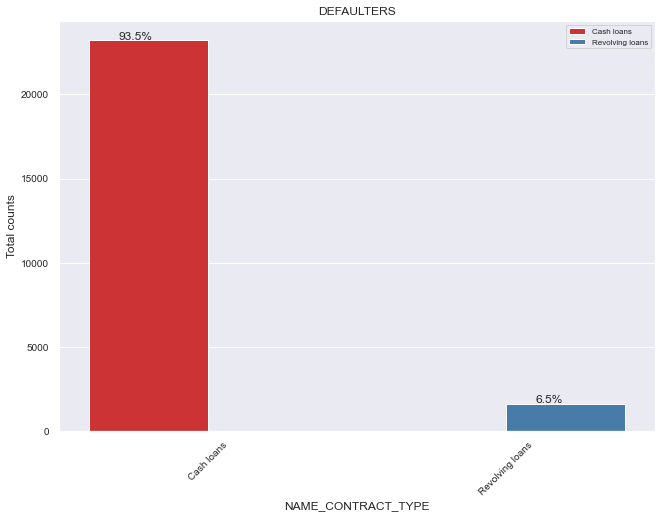

In [271]:
univariate_cat("NAME_CONTRACT_TYPE")

#### Inference:

- NAME_CONTRACT_TYPE: The revolving loans are applied less when compared to cash loans. Also the percentage of defaulters are less for revolving loans.

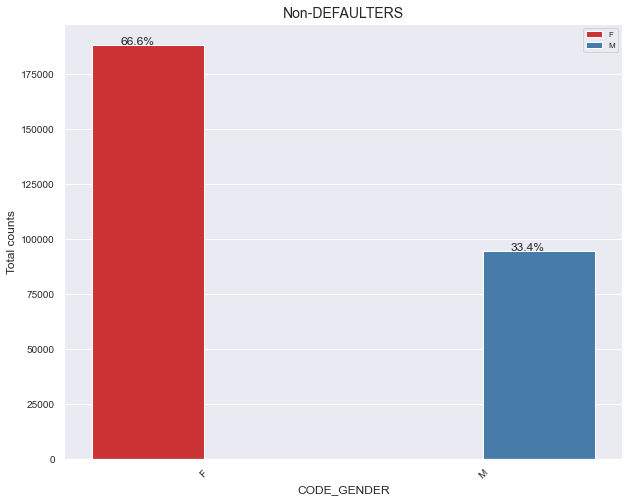

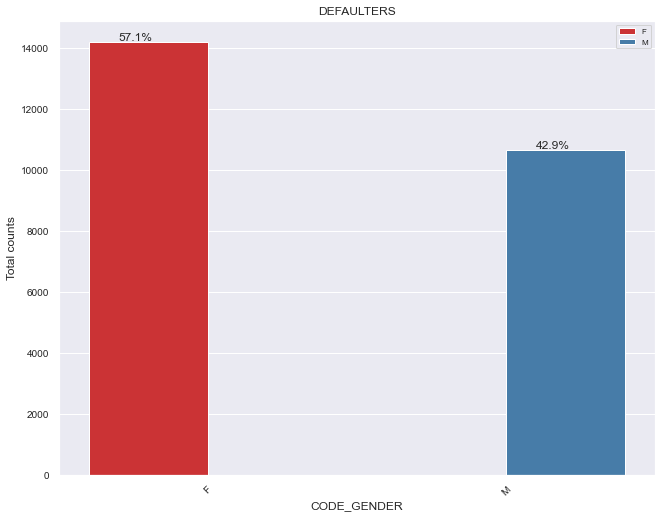

In [272]:
univariate_cat("CODE_GENDER")

#### Inference:
    
- CODE_GENDER: Female clients are the ones who apply loan when compared to male. 57% Female clients are defaulters while 42% male clients are defaulters. The percentage of male defaulters are more when compared to male non-defaulters.

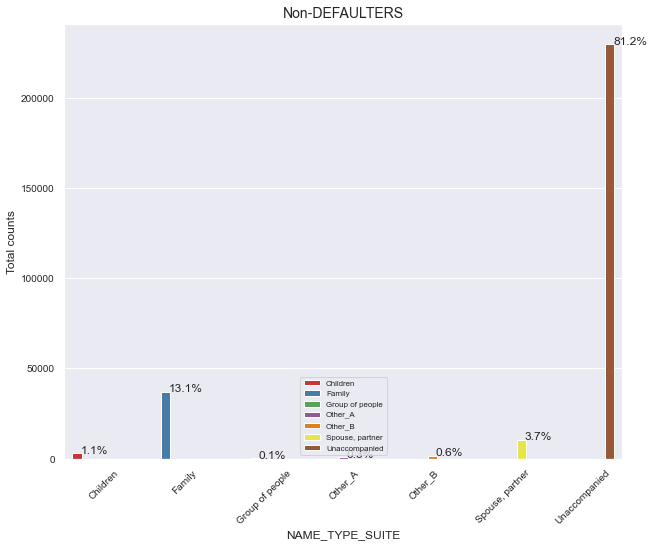

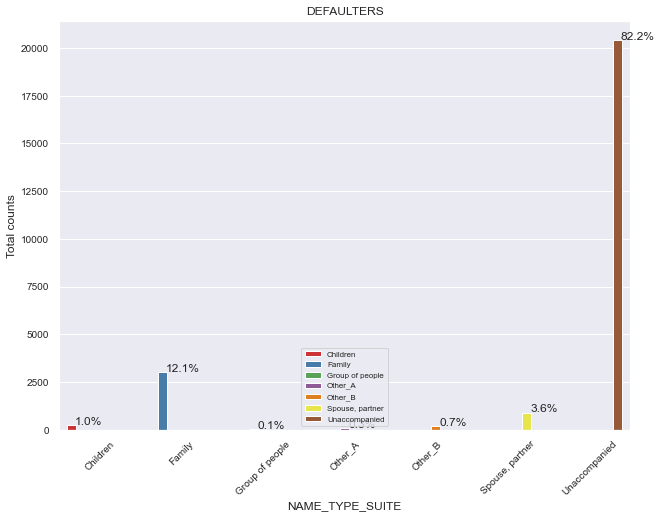

In [273]:
univariate_cat("NAME_TYPE_SUITE")

#### Inference:

- NAME_TYPE_SUITE: The family has the second highest percentage in accompanying the client. The percentage is almost same for both defaulters and non-defaulters. The first highest is that the client is unaccompanied while applying the loan.

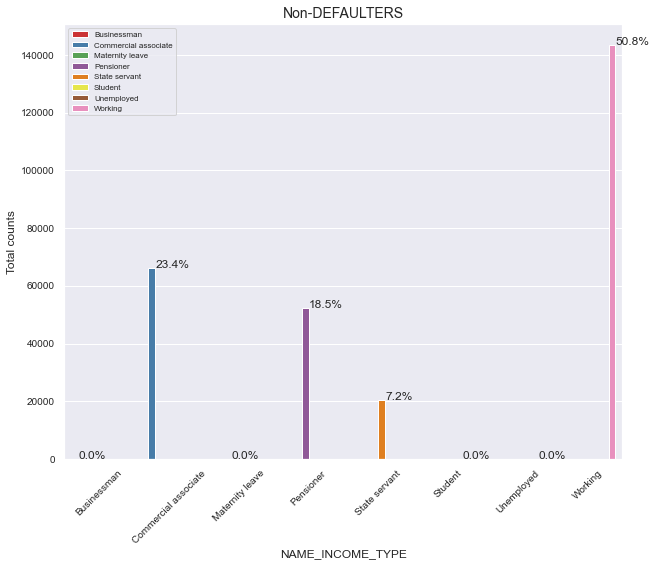

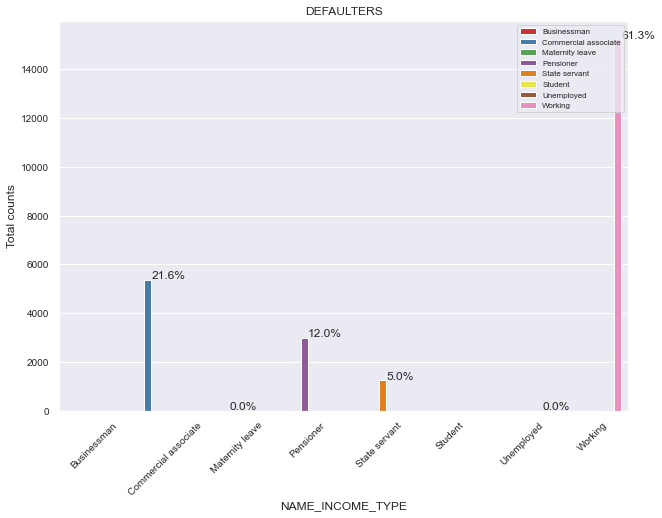

In [274]:
univariate_cat("NAME_INCOME_TYPE")

#### Inference:

- NAME_INCOME_TYPE: The income type working are the ones who apply for the loan in both Non-defaulters and defaulters. Business, Student, unemployed are less likely to apply loan. 

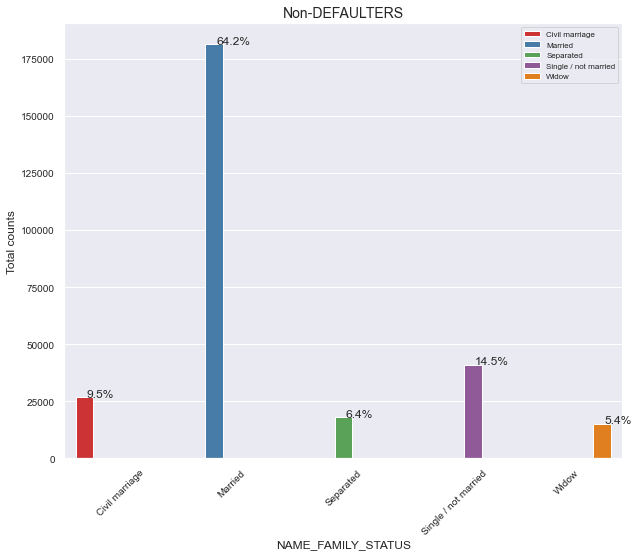

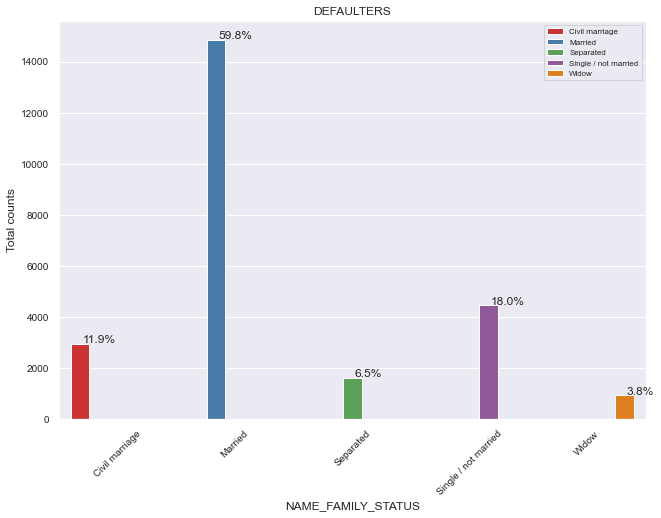

In [275]:
univariate_cat("NAME_FAMILY_STATUS")

#### Inference:
    
- NAME_FAMILY_STATUS: Married are more in number to apply for loan in both defaulters and non-defaulters. Widows have minimal risk to default.    

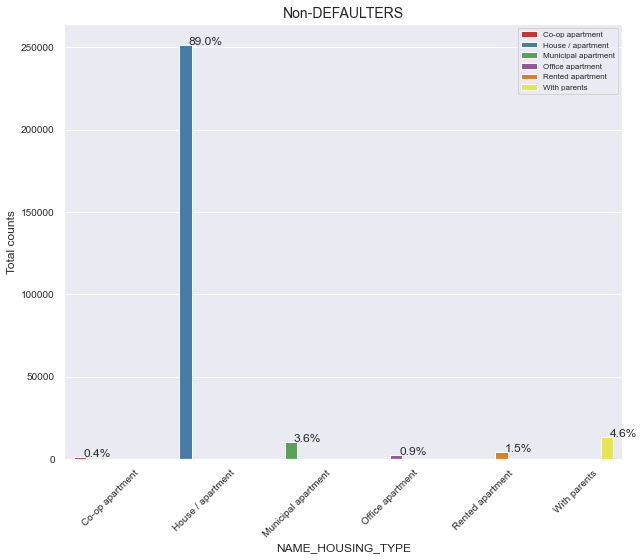

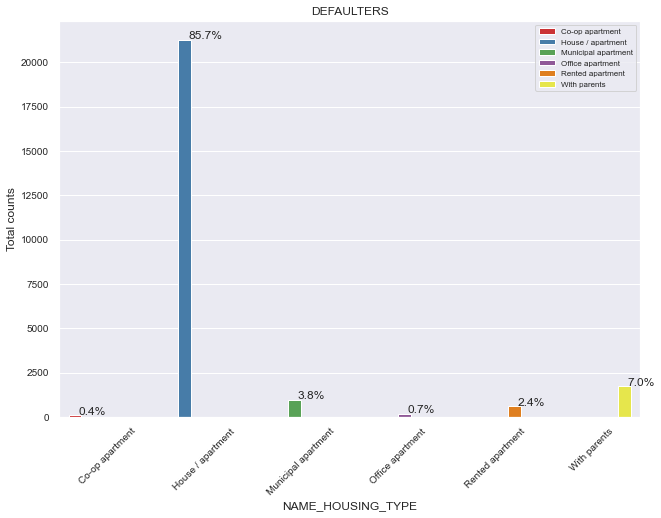

In [276]:
univariate_cat("NAME_HOUSING_TYPE")

#### Inference:
    
- NAME_HOUSING_TYPE: House / apartment has highest percentage of defaulters and non defaulters and it is clear that most of the clients has a own house or apartment.    

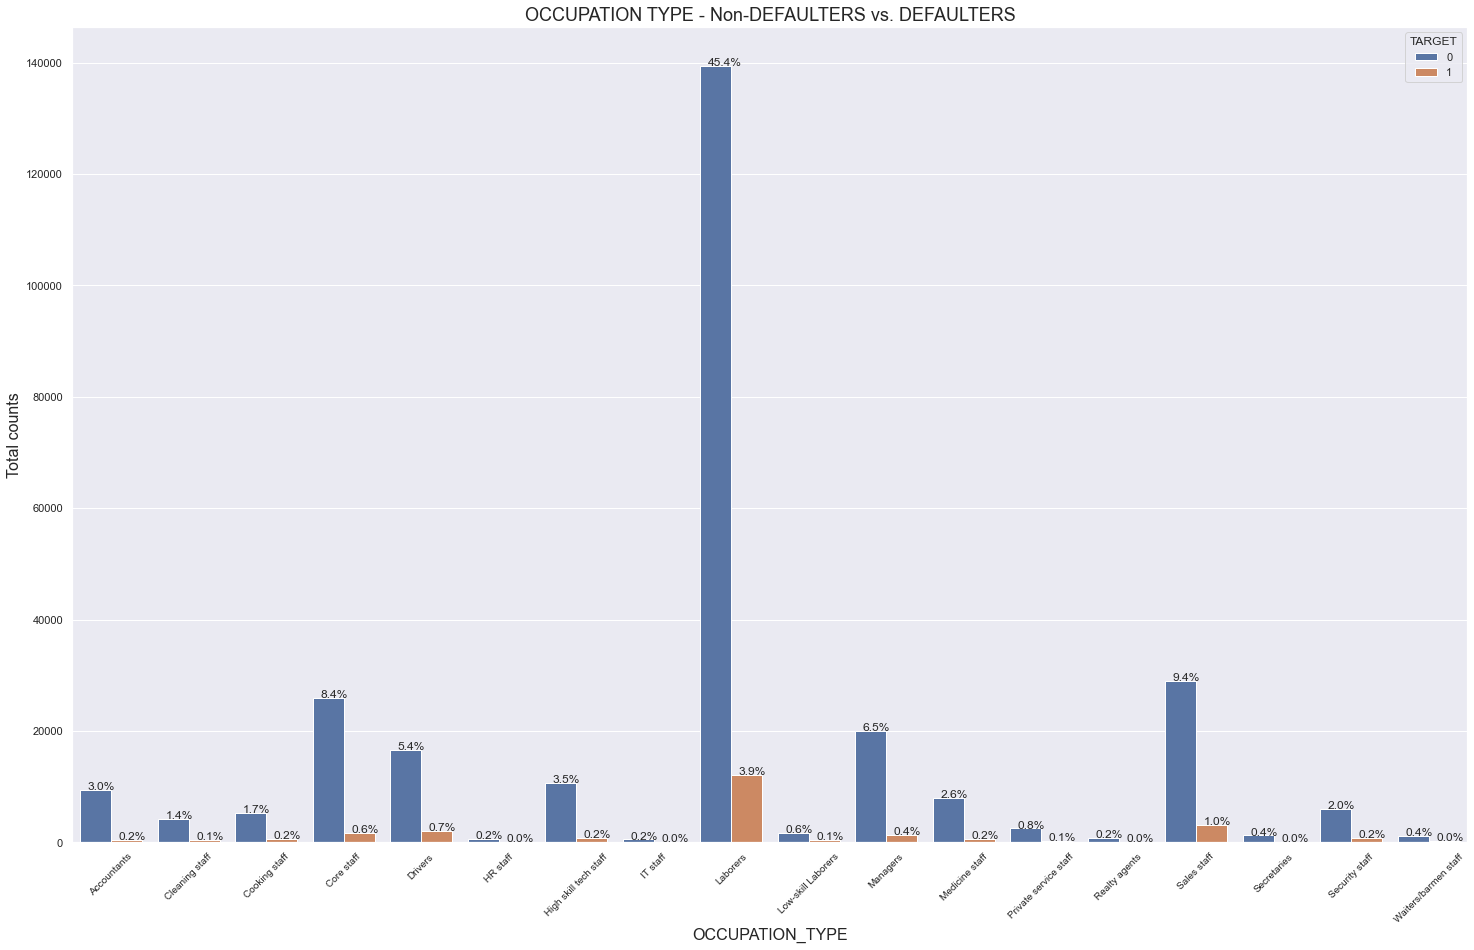

In [277]:
plt.figure(figsize=(25,15))
p1=sns.countplot(x = "OCCUPATION_TYPE", hue = 'TARGET', data = New_ApplData)
plt.xlabel("OCCUPATION_TYPE", fontsize= 16)                                                        
plt.ylabel('Total counts', fontsize= 16)
plt.title('OCCUPATION TYPE - Non-DEFAULTERS vs. DEFAULTERS', fontsize= 18)
plt.xticks(rotation = 45, fontsize=10)
for p in p1.patches:
        p1.annotate('{:.1f}%'.format((p.get_height()/len(New_ApplData))*100), (p.get_x()+0.1, p.get_height()+50)) 
plt.show()

#### Inference:
    
- OCCUPATION_TYPE: The laborers have highest percentage of defaulters and the highest percentage of non-defaulters are also laborers.    

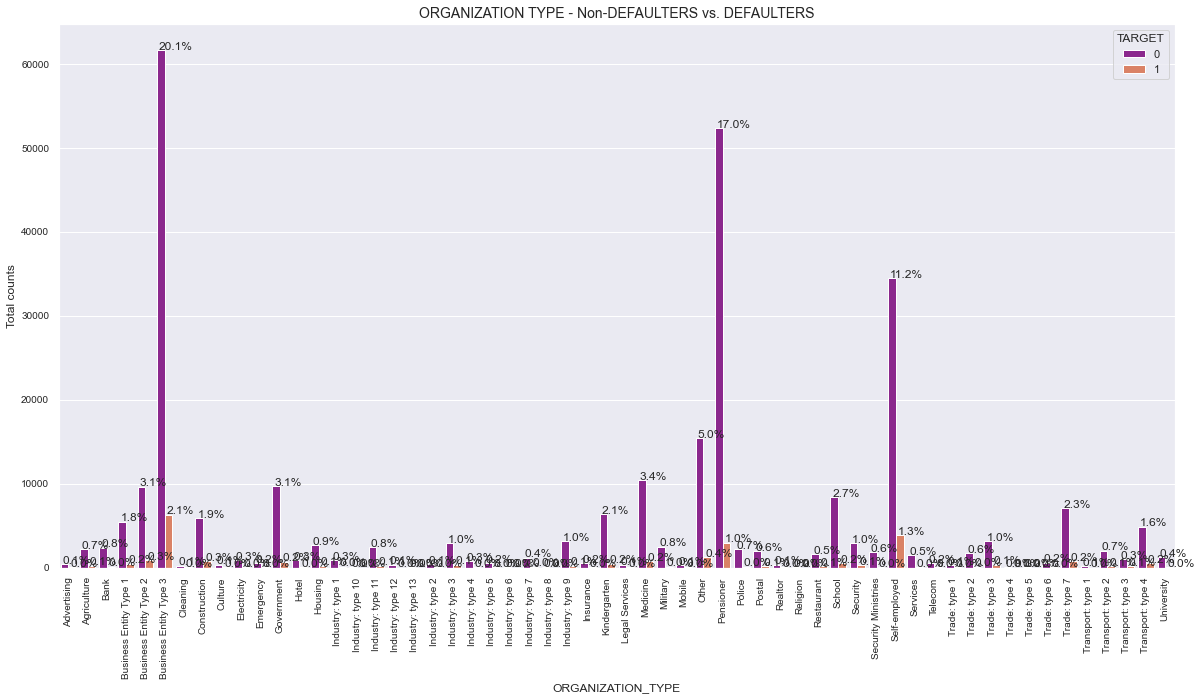

In [278]:
plt.figure(figsize=(20,10))
p1=sns.countplot(x = "ORGANIZATION_TYPE", hue = 'TARGET', data = New_ApplData, palette='plasma')
plt.xlabel("ORGANIZATION_TYPE", fontsize= 12)                                                        
plt.ylabel('Total counts', fontsize= 12)
plt.title('ORGANIZATION TYPE - Non-DEFAULTERS vs. DEFAULTERS', fontsize= 14)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
for p in p1.patches:
        p1.annotate('{:.1f}%'.format((p.get_height()/len(New_ApplData))*100), (p.get_x()+0.1, p.get_height()+50)) 
plt.show()



#### Inference:
    
- ORGANIZATION_TYPE: Clients who have applied loan are mostly from ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’. The more defaulters are from Business entity Type 3 and second is from Self employed.    

### Univariate Categorical Ordered Variables

The following variables are categorized as Univariate Categorical Ordered variables.

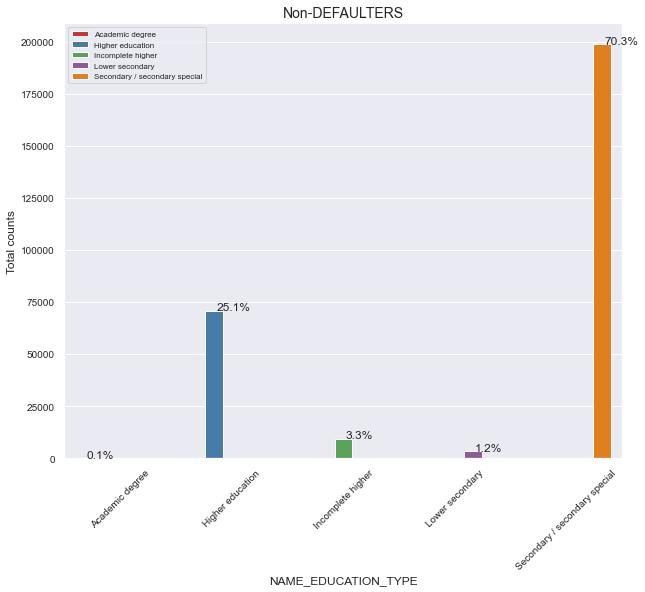

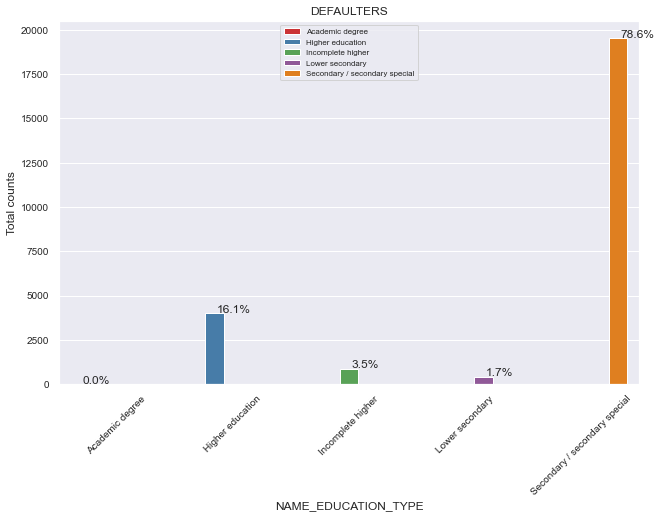

In [279]:
univariate_cat("NAME_EDUCATION_TYPE")

#### Insights:
    
- NAME_EDUCATION_TYPE: Higher education and Secondary/Secondary Special are more likely to apply loan and they are the ones who have high risk to default. Academic degree and lower education are less likely to default.    
    

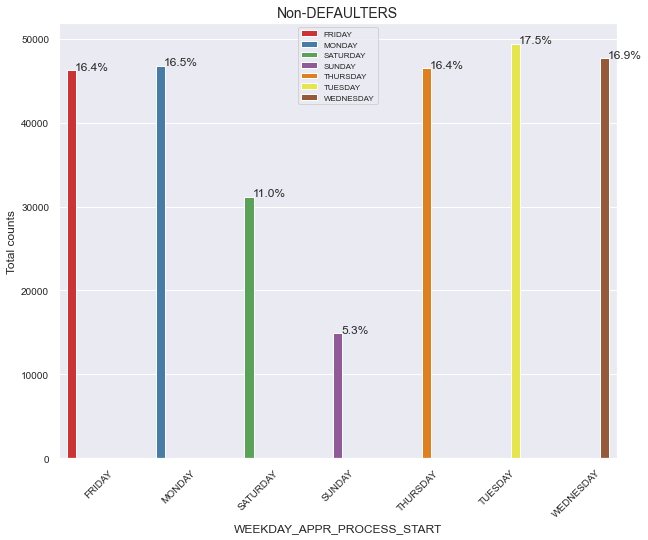

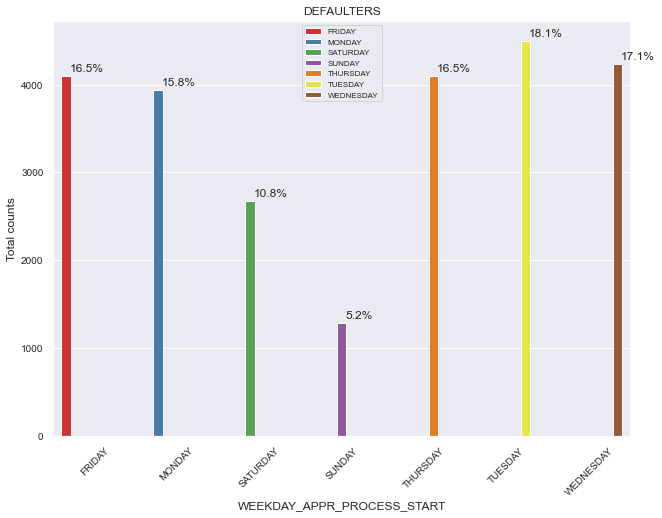

In [280]:
univariate_cat("WEEKDAY_APPR_PROCESS_START")

#### Inference:
    
- WEEKDAY_APPR_PROCESS_START: There is no major difference in days for both defaulters and non-defaulters.    

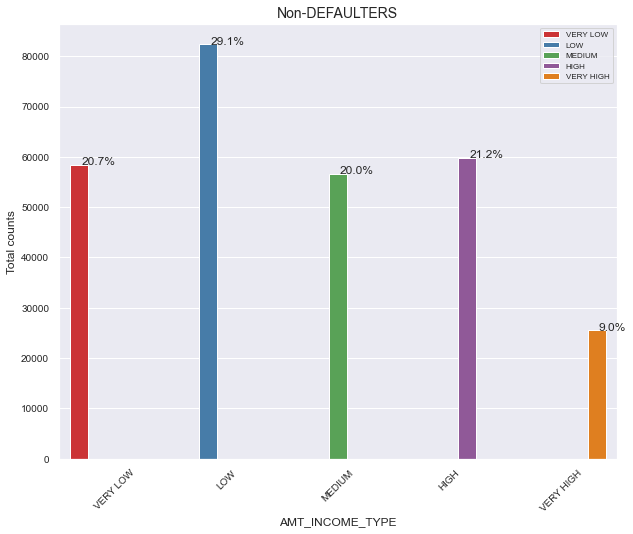

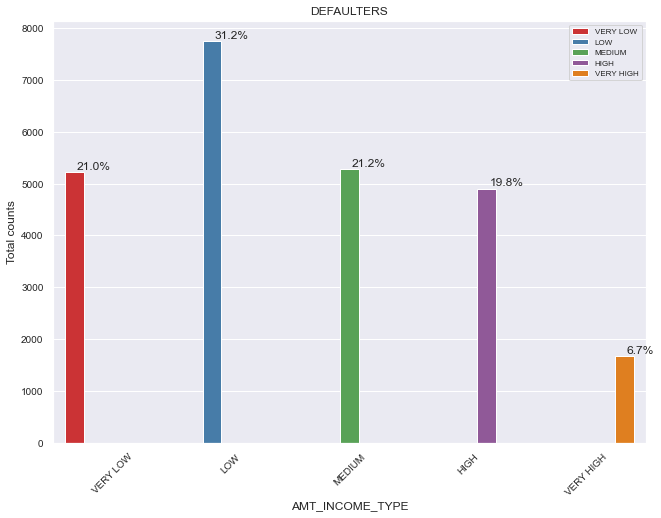

In [281]:
univariate_cat("AMT_INCOME_TYPE")

#### Inference:
    
- AMT_INCOME_TYPE: Client having low income are at high risk to default.     

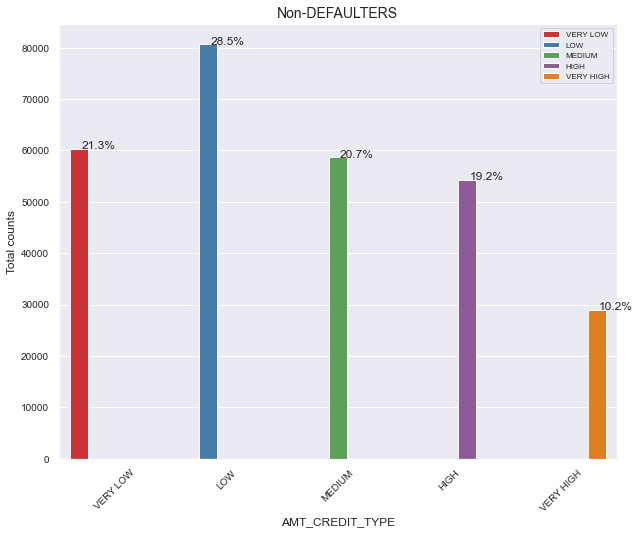

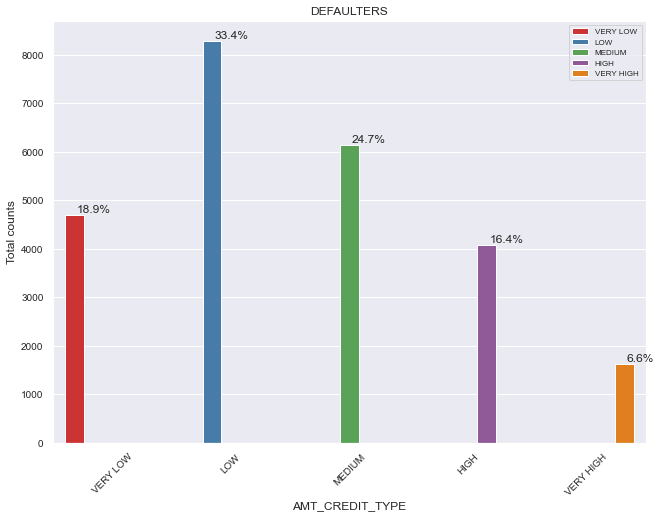

In [282]:
univariate_cat("AMT_CREDIT_TYPE")

#### Inference:

- AMT_CREDIT_TYPE: Clients having very low, low and high credit amount are having more default percentage.

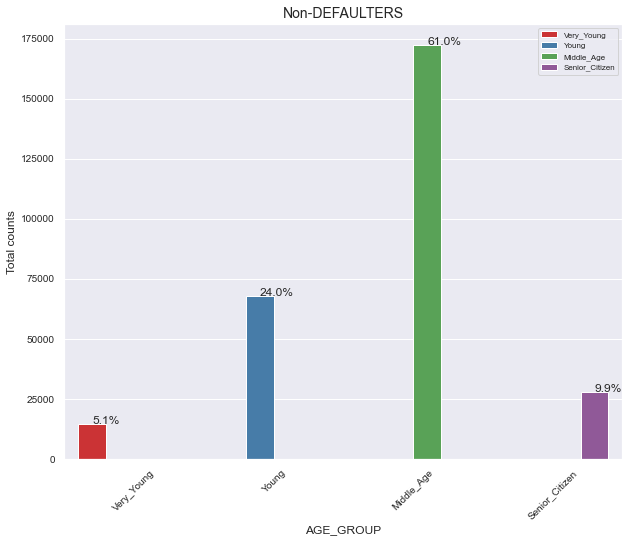

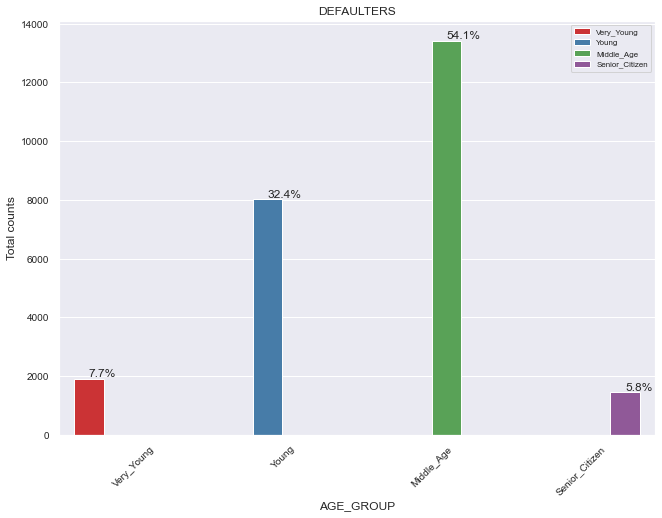

In [283]:
univariate_cat("AGE_GROUP")

#### Inference:

- AGE_GROUP: The middle age group tend to default more. The senior citizens are less likey to default.

### Univariate Numerical Variable Analysis

In [284]:
def univariate_num(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(12,6))
    
   
    plt.subplot(1,2,1)                                   
    sns.distplot(target0[col], hist=False, color="g")
    plt.yscale('linear') 
    plt.xlabel(col, fontsize= 10, fontweight="bold")
    plt.title('NON DEFAULTERS', fontsize= 12, fontweight="bold")                    
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(rotation=360, fontsize=10)
    
    
    plt.subplot(1,2,2)                                                                                                      
    sns.distplot(target1[col], hist=False, color="r")
    plt.yscale('linear')    
    plt.xlabel(col, fontsize= 10, fontweight="bold")
    plt.title('DEFAULTERS', fontsize= 12, fontweight="bold")                       
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(rotation=360, fontsize=10)
    plt.tight_layout(pad=2.0)
    plt.show()

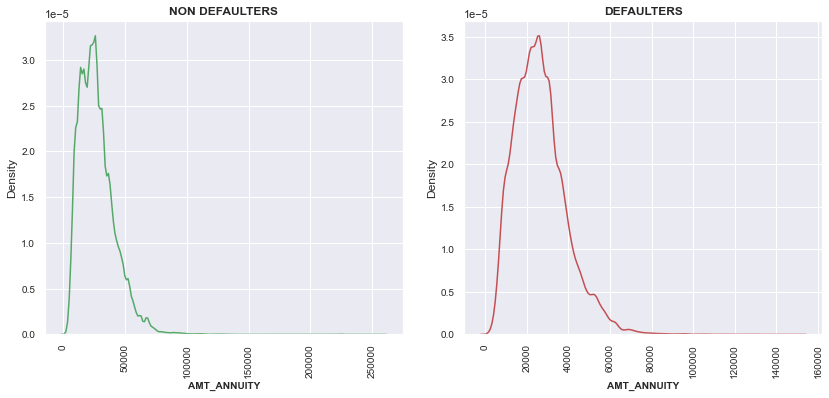

In [285]:
univariate_num('AMT_ANNUITY')

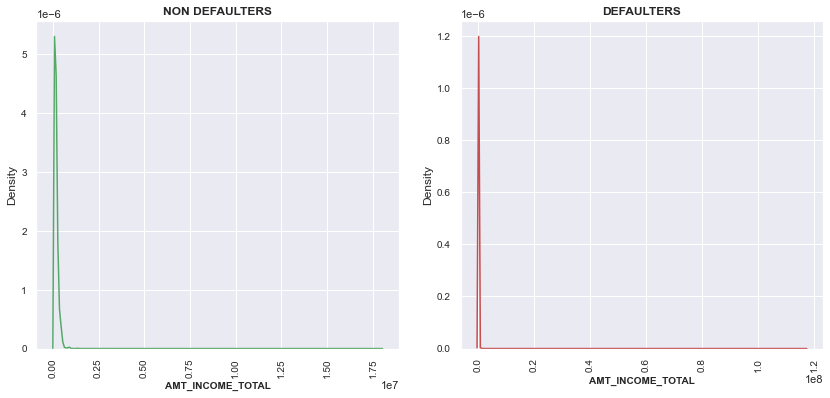

In [286]:
univariate_num('AMT_INCOME_TOTAL')

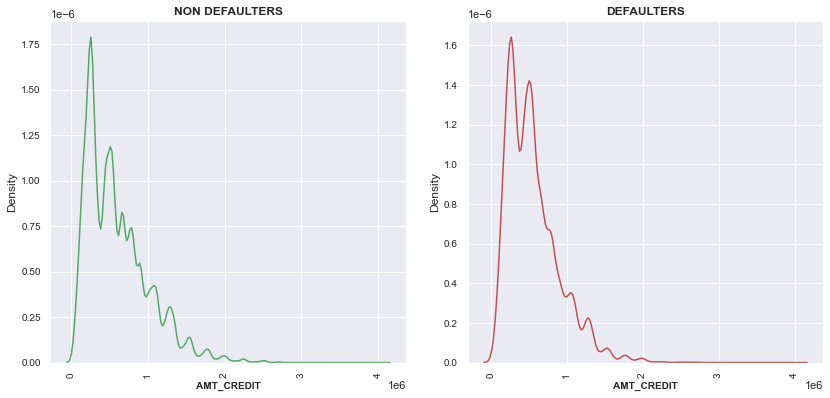

In [287]:
univariate_num('AMT_CREDIT')

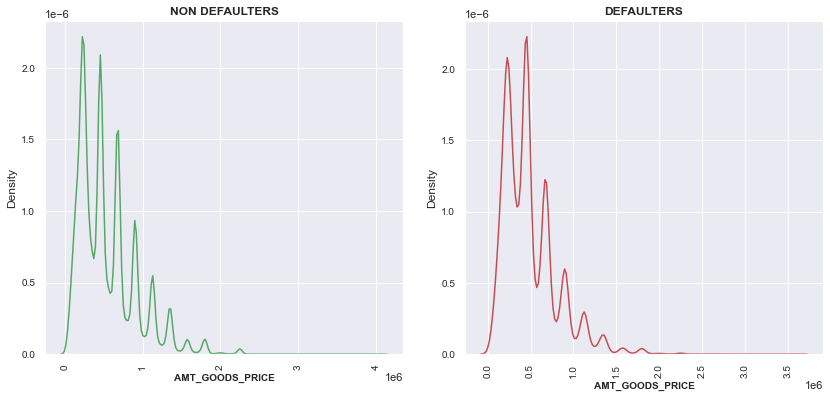

In [288]:
univariate_num('AMT_GOODS_PRICE')

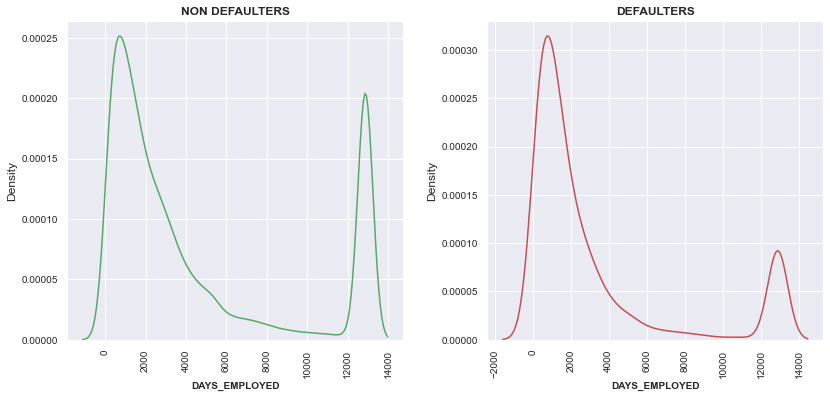

In [289]:
univariate_num('DAYS_EMPLOYED')

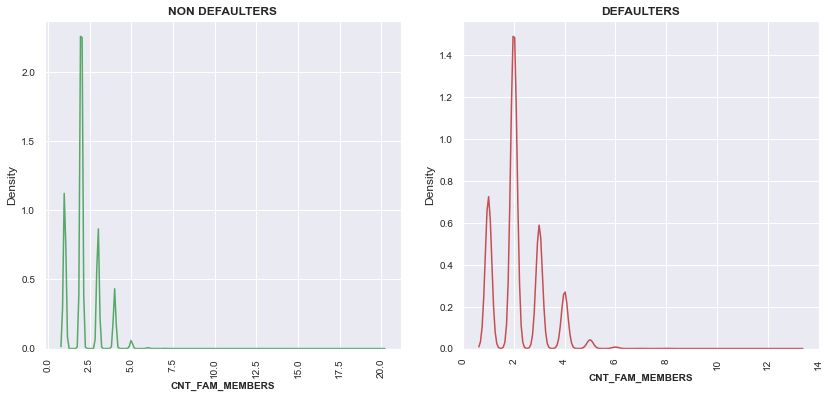

In [290]:
univariate_num('CNT_FAM_MEMBERS')

#### Insights:
    
- Clients having more family members are at high risk to default.
- Also clients having more than 4 children are more likey to default.
- Most of the clients have no children

In [291]:
New_ApplData.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25          637.0             3648.0   
1                    0.003541          45         1188.0             1186.0   
2                    0.010032          52          225.0             4260.0   
3                    0.008019          52         3039.0             9833.0   
4                    0.028663          54         3038.0             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             2120        Laborers              1.0   
1              291      Core staff              2.0   
2             2531        Laborers              1.0   
3             2437        Laborers              2.0   
4             3458      Core staff              1.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Reli

#### PAIR PLOTS for Numerical Category

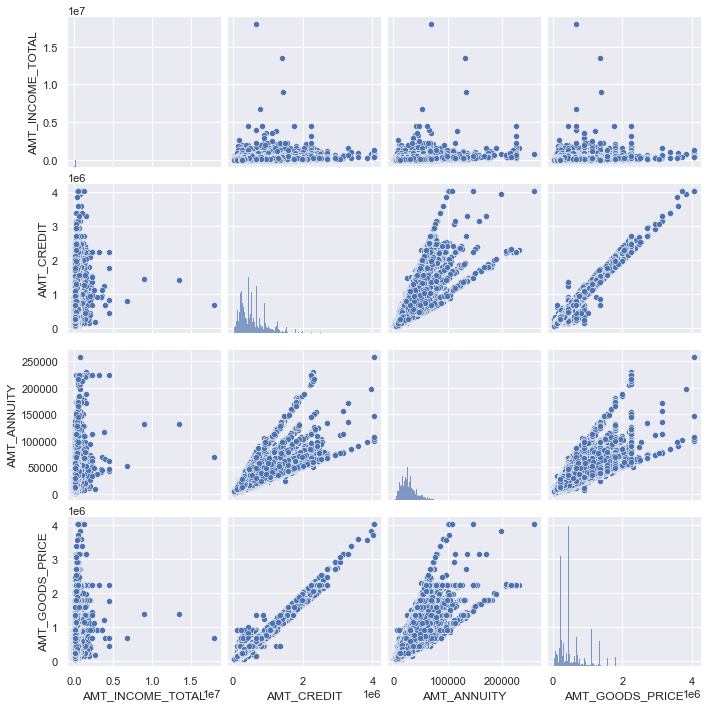

In [292]:
# Plotting pairplot between numerical variable to draw reference against Non-defaulters.

sns.pairplot(target0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].fillna(0))
plt.show()

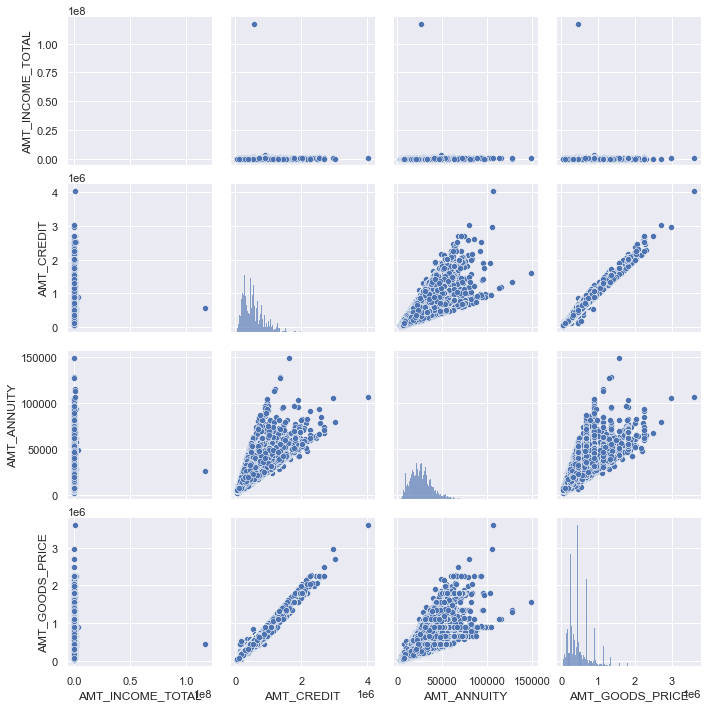

In [293]:
# Plotting pairplot between numerical variable to draw reference against Defaulters.

sns.pairplot(target1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].fillna(0))
plt.show()

Insights:
    
- AMT_CREDIT and AMT_GOODS_PRICE are highly correlated variables for both defaulters and non–defaulters and they show almost a line in the plot.
- AMT_CREDIT and AMT_ANNUITY are also highly correlated variables for both defaulters and non–defaulters

### Bivariate Analysis

- Numeric - Numeric Analysis
- Correlation of numeric variables
- Numerical - Categorical Analysis
- Categorical - Categorical Analysis

#### Numeric - Numeric Analysis

In [294]:
def bivariate(var1, var2):
    plt.figure(figsize=(20,7))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=var1, y= var2, data=target0, palette = 'Set2') 
    plt.xlabel(var1, fontsize= 14)                                                        
    plt.ylabel(var2, fontsize= 14)
    plt.title(f'{var1} vs {var2} - NON DEFAULTERS', fontsize= 16)

    
   
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=var1, y=var2, data=target1,  palette = 'Set2')                                           
    plt.xlabel(var1, fontsize= 14)
    plt.ylabel(var2, fontsize= 14)
    plt.title(f'{var1} vs {var2} - DEFAULTERS', fontsize= 16)
    plt.tight_layout(pad=3.0)
    plt.show()

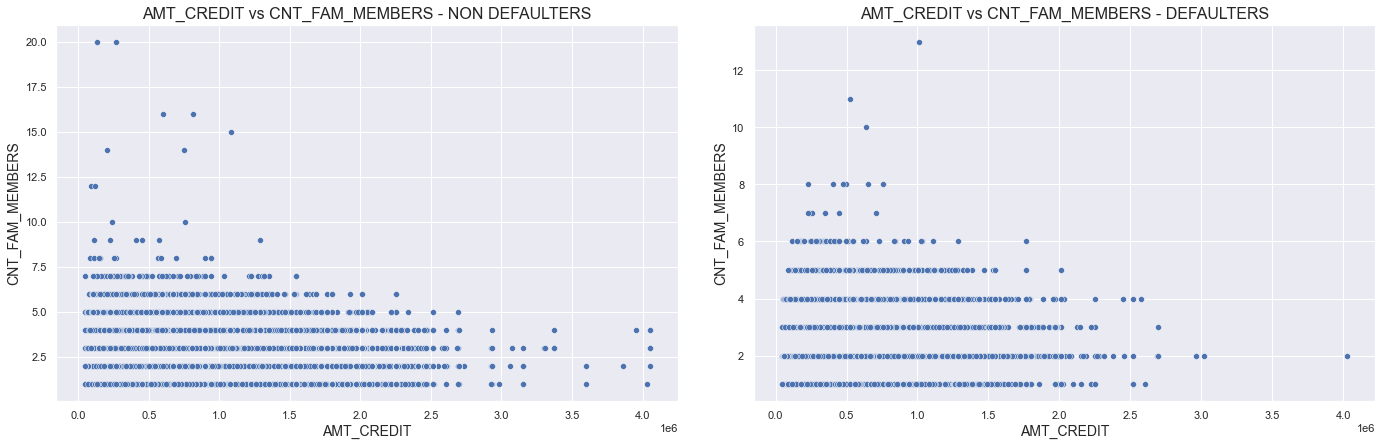

In [295]:
bivariate('AMT_CREDIT','CNT_FAM_MEMBERS')

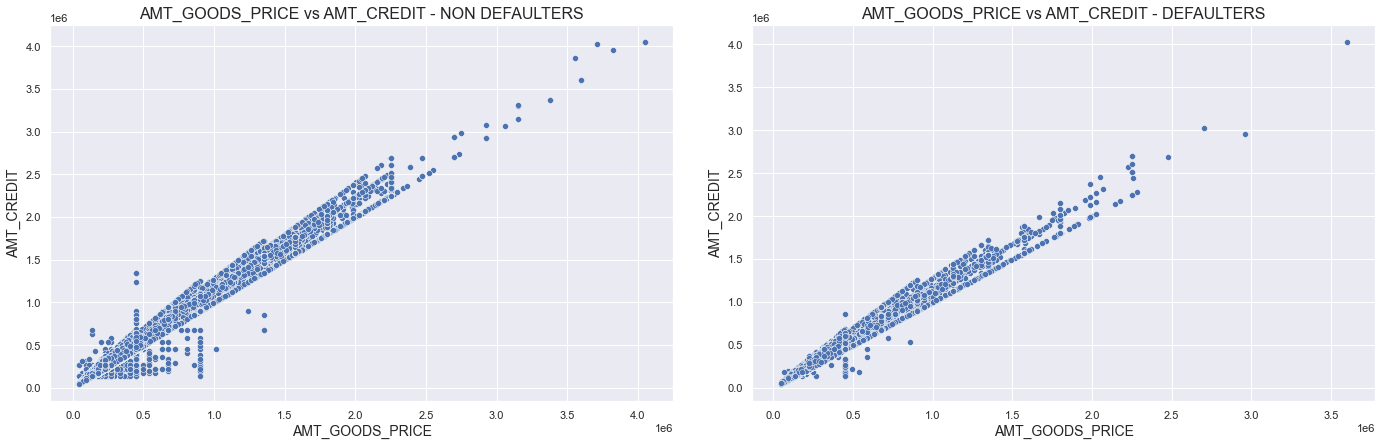

In [296]:
bivariate('AMT_GOODS_PRICE','AMT_CREDIT')

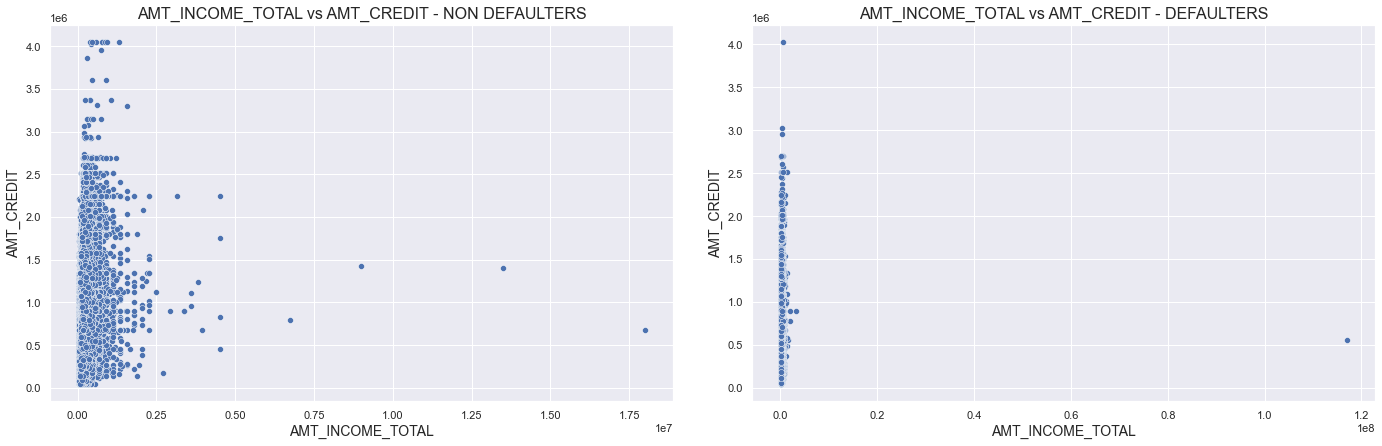

In [297]:
bivariate("AMT_INCOME_TOTAL", "AMT_CREDIT")

#### Insights:

- The non-defaulters are more likely to get higher credits than defaulters. 
- Non-defaulters who have higher goods price have higher credits than those with higher goods price but didnt pay loan.
- The density in the lower left corner is same in both non-defaulters and defaulters. Hence the people are equally likely to default if the family is small and the AMT_CREDIT is low. 
- Also larger families and people with larger AMT_CREDIT default less often.

In [298]:
New_ApplData.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25          637.0             3648.0   
1                    0.003541          45         1188.0             1186.0   
2                    0.010032          52          225.0             4260.0   
3                    0.008019          52         3039.0             9833.0   
4                    0.028663          54         3038.0             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             2120        Laborers              1.0   
1              291      Core staff              2.0   
2             2531        Laborers              1.0   
3             2437        Laborers              2.0   
4             3458      Core staff              1.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Reli

#### Numerical - Categorical Bivariate Analysis

In [299]:
def Bivar_cat_num(var1, var2, var3):
    
    plt.figure(figsize=(15,12))
    plt.xticks(rotation=45)
    plt.yscale('log')
    sns.boxplot(data =target0, x=var1,y=var2, hue =var3, orient='v')
    plt.title(f'{var1} vs. {var2} - Non-DEFAULTERS')
    
    plt.figure(figsize=(18,12))
    plt.xticks(rotation=45)
    plt.yscale('log')
    sns.boxplot(data =target1, x=var1,y=var2, hue =var3, orient='v')
    plt.title(f'{var1} vs. {var2} - DEFAULTERS')
    plt.show()

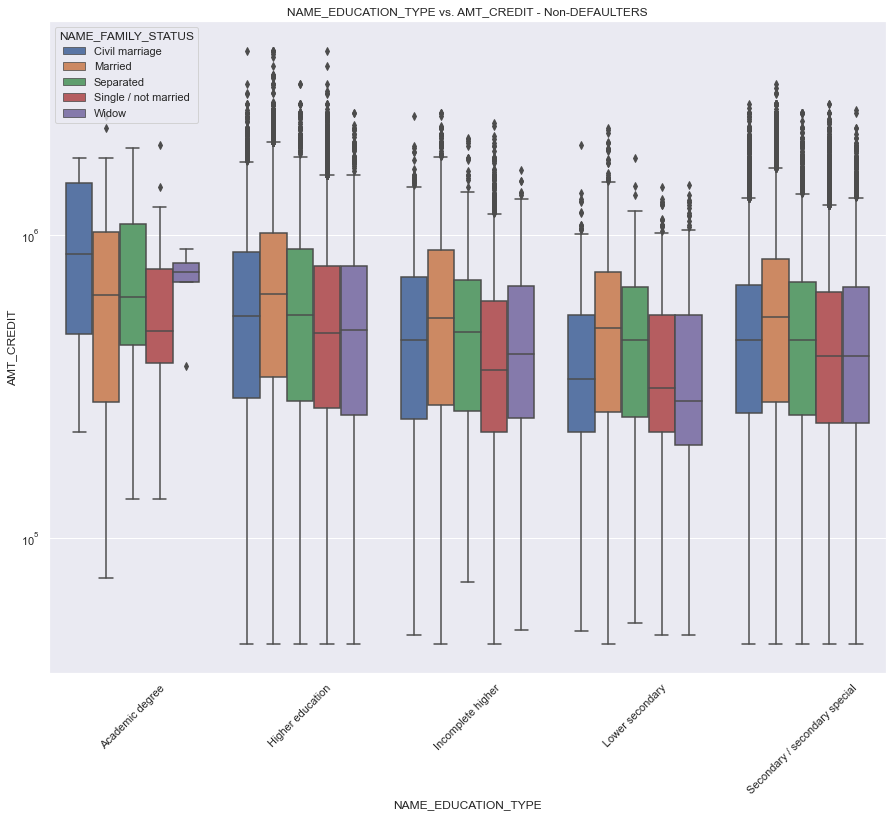

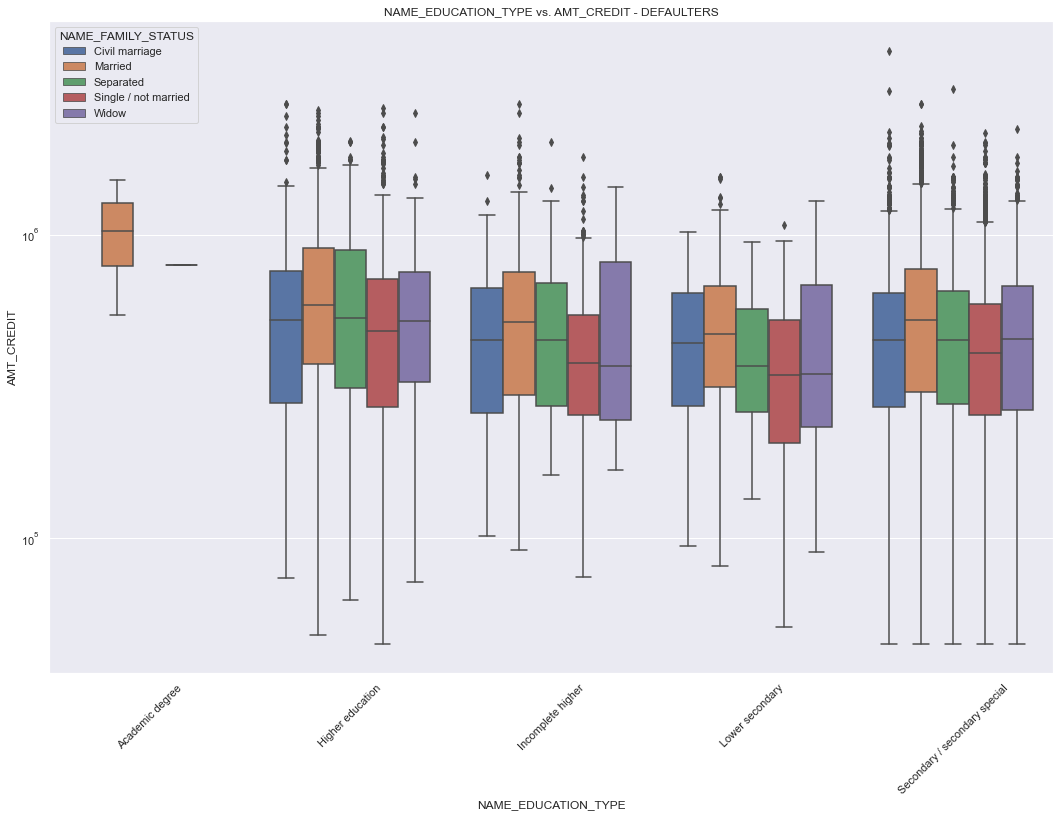

In [300]:
Bivar_cat_num('NAME_EDUCATION_TYPE','AMT_CREDIT','NAME_FAMILY_STATUS')

Insights:
  
Non-defaulters:  
    
- Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. 
- Also the higher education of civil marriage, married and single are having more outliers.
- Customers with less education have lower credit limits, with widows having the lowest.

Defaulters: 
    
- Customer with Academic degree education are having higher number of credits than others.   
- Family status of 'civil marriage', 'marriage' and 'separated' of Secondary/Secondary special are having more outliers. 
- Customers with less education have lower credit limits.

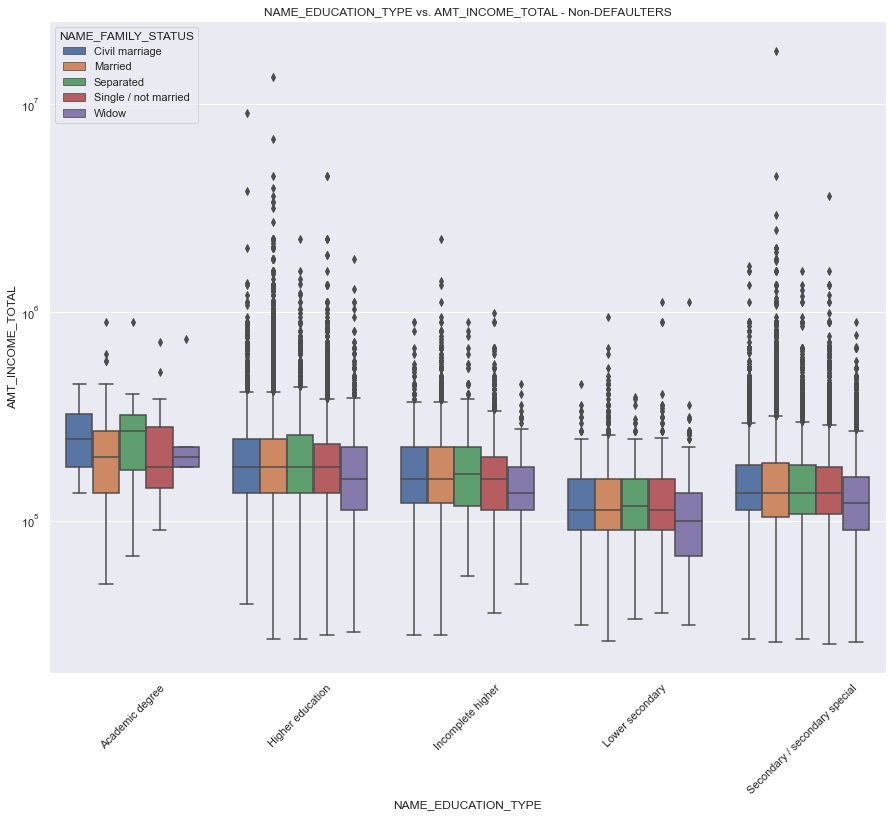

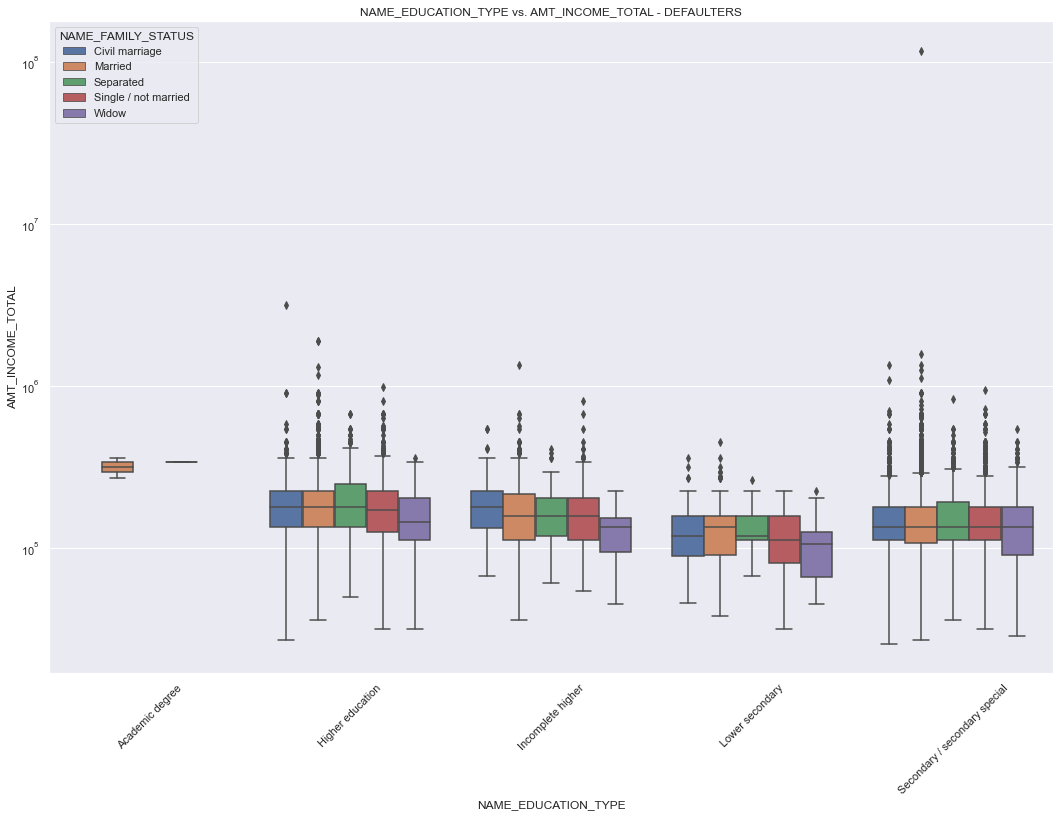

In [301]:
Bivar_cat_num('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL','NAME_FAMILY_STATUS')

Insights:

Non-defaulters:

- Family status of civil marriage and separated of Academic degree education are having higher income than others.
- Also the higher education and Secondary/Secondary special of married are having highest outliers.
- Customers with less education have lower income, with widows having the lowest.

Defaulters:

- Customer with Academic degree education are having higher income than others.
- Family status of marriage of Secondary/Secondary special is having highest outliers.
- Customers with less education have lower income, with widows having the lowest.

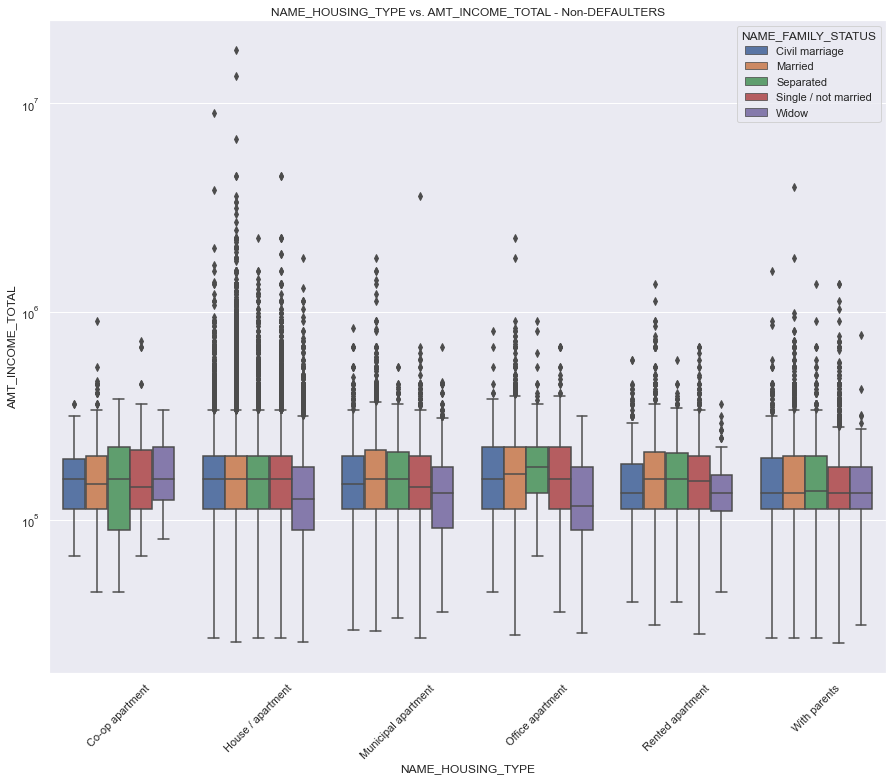

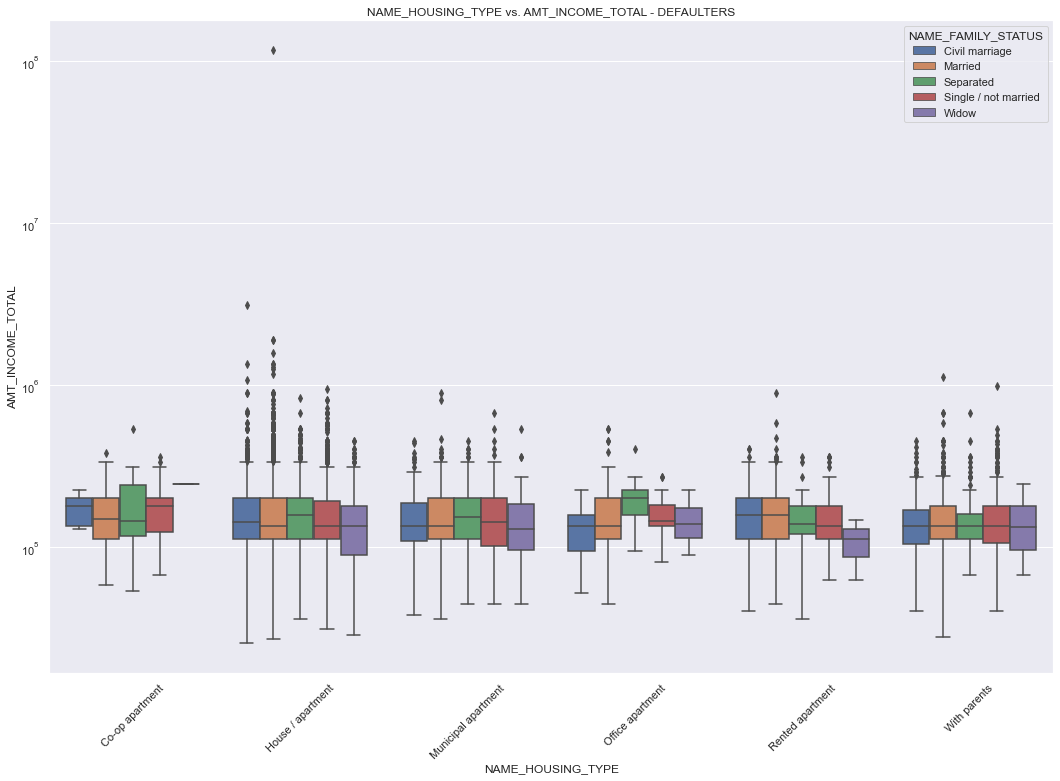

In [302]:
Bivar_cat_num('NAME_HOUSING_TYPE','AMT_INCOME_TOTAL','NAME_FAMILY_STATUS')

Insights:

Non-defaulters:

- Family status of separated of co-op apartment are having higher income than others.
- Also the house/apartment of married are having highest outliers.
- Rented apartment customer especially widow have lower income.

Defaulters:

- Family status of separated of co-op apartment are having higher income than others.
- Also the house/apartment of married are having highest outliers.
- Rented apartment customer especially widow have lower income.

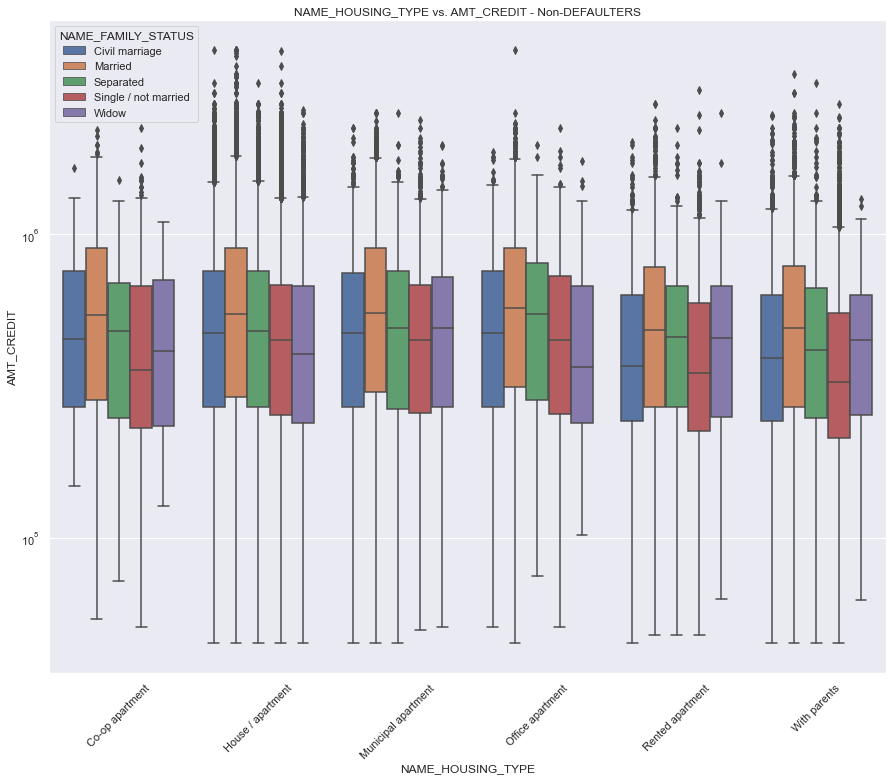

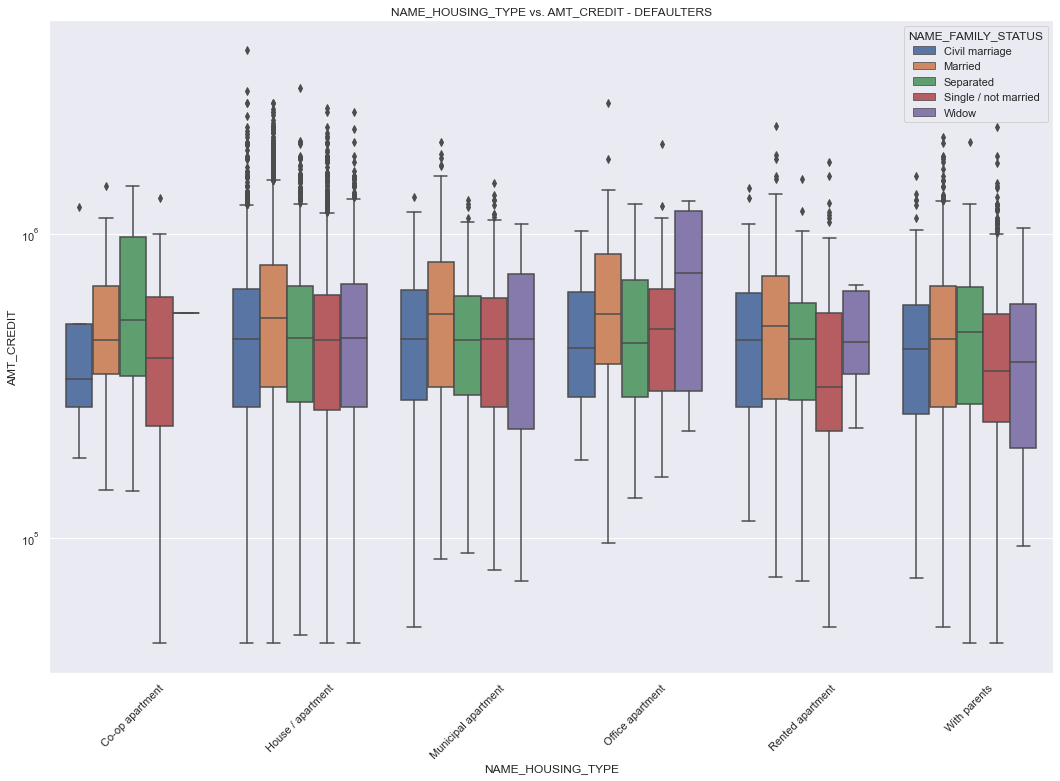

In [303]:
Bivar_cat_num('NAME_HOUSING_TYPE','AMT_CREDIT','NAME_FAMILY_STATUS')

Insights:

Non-defaulters:

- Family status of married in office apartment are having higher credit limit.
- Also the house/apartment of civil marriage, married and single are having highest outliers.
- Single with parents and rented apartments have low credit amount.

Defaulters:

- Family status of widow of office apartment is having higher credit amount than others.
- Also the house/apartment of civil marriage is having highest outliers.
- single in Rented apartment have lower credit amount.

#### Categorical - Categorical Bivariate Analysis

In [304]:
New_ApplData.TARGET.mean()

0.08072934450699004

In [305]:
New_ApplData.groupby("NAME_HOUSING_TYPE")["TARGET"].mean()

NAME_HOUSING_TYPE
Co-op apartment        0.079323
House / apartment      0.077957
Municipal apartment    0.085405
Office apartment       0.065724
Rented apartment       0.123131
With parents           0.116981
Name: TARGET, dtype: float64

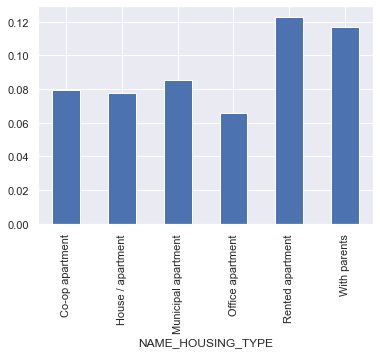

In [306]:
New_ApplData.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().plot.bar()
plt.show()

In [307]:
New_ApplData.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean()

NAME_EDUCATION_TYPE
Academic degree                  0.018293
Higher education                 0.053552
Incomplete higher                0.084850
Lower secondary                  0.109305
Secondary / secondary special    0.089399
Name: TARGET, dtype: float64

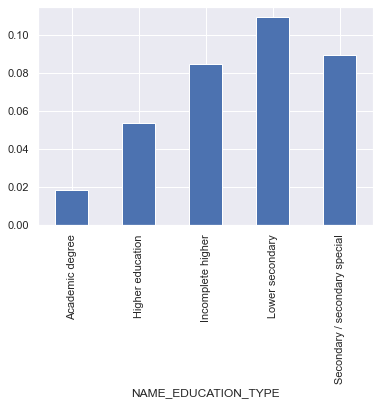

In [308]:
New_ApplData.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().plot.bar()
plt.show()

In [309]:
New_ApplData.groupby("CODE_GENDER")["TARGET"].mean()

CODE_GENDER
F    0.069992
M    0.101420
Name: TARGET, dtype: float64

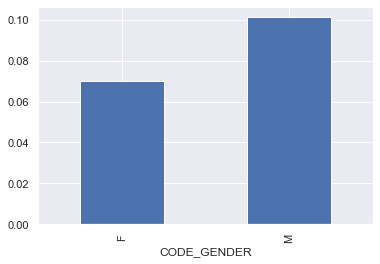

In [310]:

New_ApplData.groupby("CODE_GENDER")["TARGET"].mean().plot.bar()
plt.show()

In [311]:
New_ApplData.groupby("OCCUPATION_TYPE")["TARGET"].mean()

OCCUPATION_TYPE
Accountants              0.048308
Cleaning staff           0.096067
Cooking staff            0.104440
Core staff               0.063040
Drivers                  0.113261
HR staff                 0.063943
High skill tech staff    0.061599
IT staff                 0.064639
Laborers                 0.079933
Low-skill Laborers       0.171524
Managers                 0.062143
Medicine staff           0.067002
Private service staff    0.065988
Realty agents            0.078562
Sales staff              0.096318
Secretaries              0.070498
Security staff           0.107424
Waiters/barmen staff     0.112760
Name: TARGET, dtype: float64

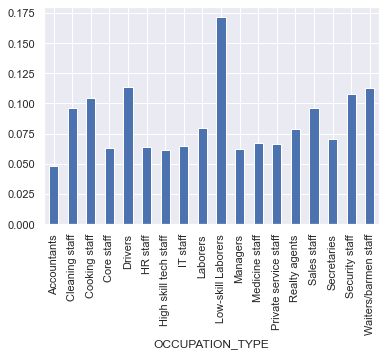

In [312]:
New_ApplData.groupby("OCCUPATION_TYPE")["TARGET"].mean().plot.bar()
plt.show()

#### Insights:
    
- The Rented apartment, Male client, Low-skill labourers and lower secondary are highly at risk to default.    

## Multivariate Analysis 

In [313]:
New=pd.pivot_table(New_ApplData, values='TARGET', index=['CODE_GENDER','AMT_INCOME_TYPE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
New

NAME_EDUCATION_TYPE          Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_TYPE                                      
F           VERY LOW                0.000000          0.056068   
            LOW                     0.000000          0.049022   
            MEDIUM                  0.000000          0.051962   
            HIGH                    0.038462          0.046636   
            VERY HIGH               0.083333          0.037913   
M           VERY LOW                0.000000          0.080411   
            LOW                     0.000000          0.073305   
            MEDIUM                  0.000000          0.075015   
            HIGH                    0.000000          0.063271   
            VERY HIGH               0.000000          0.047101   

NAME_EDUCATION_TYPE          Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_TYPE                                       
F           VERY LOW                  0.086399         0.080193   
            LOW                       0.080075         0.113889   
            MEDIUM                    0.086560         0.094276   
            HIGH                      0.067755         0.094340   
            VERY HIGH                 0.080000         0.021277   
M           VERY LOW                  0.123967         0.125000   
            LOW                       0.097778         0.142857   
            MEDIUM                    0.092634         0.163462   
            HIGH                      0.092145         0.105042   
            VERY HIGH                 0.071315         0.111111   

NAME_EDUCATION_TYPE          Secondary / secondary special  
CODE_GENDER AMT_INCOME_TYPE                                 
F           VERY LOW                              0.076778  
            LOW                                   0.079523  
            MEDIUM                                0.076766  
            HIGH                                  0.073356  
            VERY HIGH                             0.067537  
M           VERY LOW                              0.118066  
            LOW                                   0.123693  
            MEDIUM                                0.118825  
            HIGH                                  0.102555  
            VERY HIGH                             0.091366

Insights:

- Female clients with an Academic degree and high-income type have a higher risk of default.
- Female clients with Low income and Lower education have a higher risk of default.
- Male clients with Incomplete Education having very low salaries have a high risk of default.
- Male Clients with Lower Secondary Education having having all types of salaries have a high risk to default.
- Male clients with Secondary/Secondary Special Education having almost all types of salaries have a higher risk of default.



#### Correlation for the Non-Defaulters and Defaulters

In [314]:
New_ApplData.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_

In [315]:
target0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541          45         1188.0             1186.0   
2                    0.010032          52          225.0             4260.0   
3                    0.008019          52         3039.0             9833.0   
4                    0.028663          54         3038.0             4311.0   
5                    0.035792          46         1588.0             4970.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1              291      Core staff              2.0   
2             2531        Laborers              1.0   
3             2437        Laborers              2.0   
4             3458      Core staff              1.0   
5              477        Laborers              2.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   
5                       0                        0              

In [319]:
target0_corr=target0[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','CNT_FAM_MEMBERS']].corr()     
target0_corr                

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                    1.000000          0.027403    0.003082   
AMT_INCOME_TOTAL                0.027403          1.000000    0.342802   
AMT_CREDIT                      0.003082          0.342802    1.000000   
AMT_ANNUITY                     0.020910          0.418949    0.771297   
AMT_GOODS_PRICE                -0.000560          0.349433    0.987022   
REGION_POPULATION_RELATIVE     -0.024362          0.167856    0.100604   
DAYS_BIRTH                     -0.336912         -0.062486    0.047367   
DAYS_EMPLOYED                  -0.244103         -0.111523   -0.025896   
DAYS_REGISTRATION              -0.185795         -0.064932   -0.013477   
DAYS_ID_PUBLISH                 0.028751         -0.022904    0.001463   
CNT_FAM_MEMBERS                 0.878571          0.034256    0.064536   

                            AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                   0.020910        -0.000560   
AMT_INCOME_TOTAL               0.418949         0.349433   
AMT_CREDIT                     0.771297         0.987022   
AMT_ANNUITY                    1.000000         0.776422   
AMT_GOODS_PRICE                0.776422         1.000000   
REGION_POPULATION_RELATIVE     0.120977         0.103827   
DAYS_BIRTH                    -0.012249         0.044636   
DAYS_EMPLOYED                 -0.071295        -0.024040   
DAYS_REGISTRATION             -0.039434        -0.015893   
DAYS_ID_PUBLISH               -0.014113         0.003677   
CNT_FAM_MEMBERS                0.075789         0.062763   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN                                 -0.024362   -0.336912   
AMT_INCOME_TOTAL                              0.167856   -0.062486   
AMT_CREDIT                                    0.100604    0.047367   
AMT_ANNUITY                                   0.120977   -0.012249   
AMT_GOODS_PRICE                               0.103827    0.044636   
REGION_POPULATION_RELATIVE                    1.000000    0.025333   
DAYS_BIRTH                                    0.025333    1.000000   
DAYS_EMPLOYED                                -0.010002    0.674781   
DAYS_REGISTRATION                             0.052085    0.333022   
DAYS_ID_PUBLISH                               0.001075    0.270806   
CNT_FAM_MEMBERS                              -0.023425   -0.285806   

                            DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
CNT_CHILDREN                    -0.244103          -0.185795         0.028751   
AMT_INCOME_TOTAL                -0.111523          -0.064932        -0.022904   
AMT_CREDIT                      -0.025896          -0.013477         0.001463   
AMT_ANNUITY                     -0.071295          -0.039434        -0.014113   
AMT_GOODS_PRICE                 -0.024040          -0.015893         0.003677   
REGION_POPULATION_RELATIVE      -0.010002           0.052085         0.001075   
DAYS_BIRTH                       0.674781           0.333022         0.270806   
DAYS_EMPLOYED                    1.000000           0.254371         0.280192   
DAYS_REGISTRATION                0.254371           1.000000         0.100235   
DAYS_ID_PUBLISH                  0.280192           0.100235         1.000000   
CNT_FAM_MEMBERS                 -0.224044          -0.175630         0.020460   

                            CNT_FAM_MEMBERS  
CNT_CHILDREN                       0.878571  
AMT_INCOME_TOTAL                   0.034256  
AMT_CREDIT                         0.064536  
AMT_ANNUITY                        0.075789  
AMT_GOODS_PRICE                    0.062763  
REGION_POPULATION_RELATIVE        -0.023425  
DAYS_BIRTH                        -0.285806  
DAYS_EMPLOYED                     -0.224044  
DAYS_REGISTRATION                 -0.175630  
DAYS_ID_PUBLISH                    0.020460  
CNT_FAM_MEMBERS                    1.000000

In [320]:
target1_corr=target1[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','CNT_FAM_MEMBERS']].corr()
target1_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                    1.000000          0.004796   -0.001675   
AMT_INCOME_TOTAL                0.004796          1.000000    0.038131   
AMT_CREDIT                     -0.001675          0.038131    1.000000   
AMT_ANNUITY                     0.031257          0.046421    0.752195   
AMT_GOODS_PRICE                -0.008111          0.037591    0.982783   
REGION_POPULATION_RELATIVE     -0.031975          0.009135    0.069161   
DAYS_BIRTH                     -0.259222         -0.003154    0.135070   
DAYS_EMPLOYED                  -0.187040         -0.013480    0.043497   
DAYS_REGISTRATION              -0.149154         -0.000158    0.025854   
DAYS_ID_PUBLISH                 0.032299          0.004215    0.052329   
CNT_FAM_MEMBERS                 0.885484          0.006654    0.051224   

                            AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                   0.031257        -0.008111   
AMT_INCOME_TOTAL               0.046421         0.037591   
AMT_CREDIT                     0.752195         0.982783   
AMT_ANNUITY                    1.000000         0.752295   
AMT_GOODS_PRICE                0.752295         1.000000   
REGION_POPULATION_RELATIVE     0.071690         0.076053   
DAYS_BIRTH                     0.014028         0.135532   
DAYS_EMPLOYED                 -0.053780         0.049976   
DAYS_REGISTRATION             -0.034279         0.025661   
DAYS_ID_PUBLISH                0.016767         0.056061   
CNT_FAM_MEMBERS                0.075711         0.047367   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN                                 -0.031975   -0.259222   
AMT_INCOME_TOTAL                              0.009135   -0.003154   
AMT_CREDIT                                    0.069161    0.135070   
AMT_ANNUITY                                   0.071690    0.014028   
AMT_GOODS_PRICE                               0.076053    0.135532   
REGION_POPULATION_RELATIVE                    1.000000    0.047956   
DAYS_BIRTH                                    0.047956    1.000000   
DAYS_EMPLOYED                                 0.020167    0.626857   
DAYS_REGISTRATION                             0.056222    0.289116   
DAYS_ID_PUBLISH                               0.015537    0.252256   
CNT_FAM_MEMBERS                              -0.030163   -0.203403   

                            DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
CNT_CHILDREN                    -0.187040          -0.149154         0.032299   
AMT_INCOME_TOTAL                -0.013480          -0.000158         0.004215   
AMT_CREDIT                       0.043497           0.025854         0.052329   
AMT_ANNUITY                     -0.053780          -0.034279         0.016767   
AMT_GOODS_PRICE                  0.049976           0.025661         0.056061   
REGION_POPULATION_RELATIVE       0.020167           0.056222         0.015537   
DAYS_BIRTH                       0.626857           0.289116         0.252256   
DAYS_EMPLOYED                    1.000000           0.224022         0.244116   
DAYS_REGISTRATION                0.224022           1.000000         0.096833   
DAYS_ID_PUBLISH                  0.244116           0.096833         1.000000   
CNT_FAM_MEMBERS                 -0.167371          -0.145828         0.031785   

                            CNT_FAM_MEMBERS  
CNT_CHILDREN                       0.885484  
AMT_INCOME_TOTAL                   0.006654  
AMT_CREDIT                         0.051224  
AMT_ANNUITY                        0.075711  
AMT_GOODS_PRICE                    0.047367  
REGION_POPULATION_RELATIVE        -0.030163  
DAYS_BIRTH                        -0.203403  
DAYS_EMPLOYED                     -0.167371  
DAYS_REGISTRATION                 -0.145828  
DAYS_ID_PUBLISH                    0.031785  
CNT_FAM_MEMBERS                    1.000000

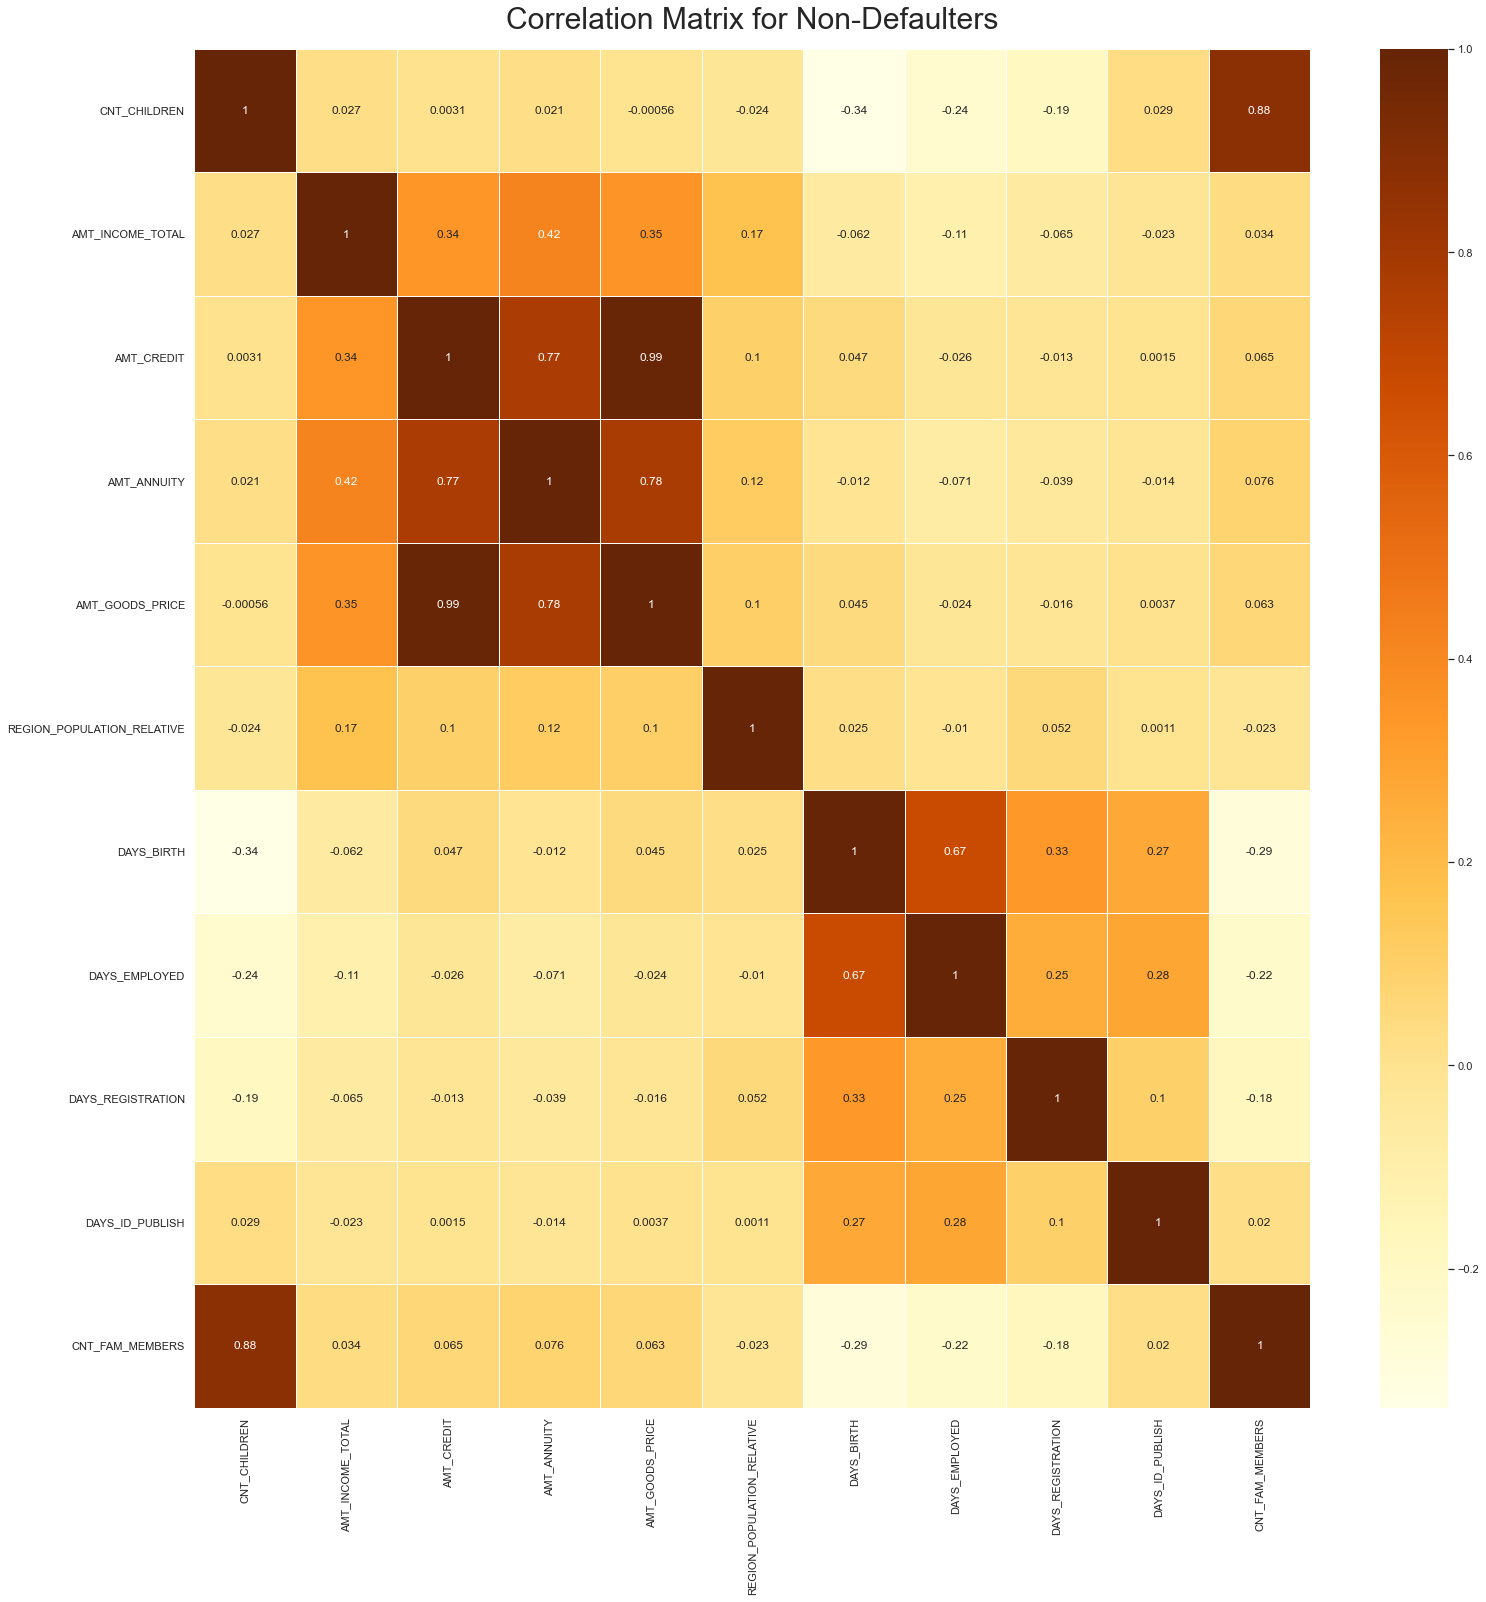

In [321]:
plt.figure(figsize=(25,25))
sns.heatmap(target0_corr, annot=True, cmap="YlOrBr", linewidth=1)
plt.title("Correlation Matrix for Non-Defaulters",fontsize=30, pad=20)
plt.show()

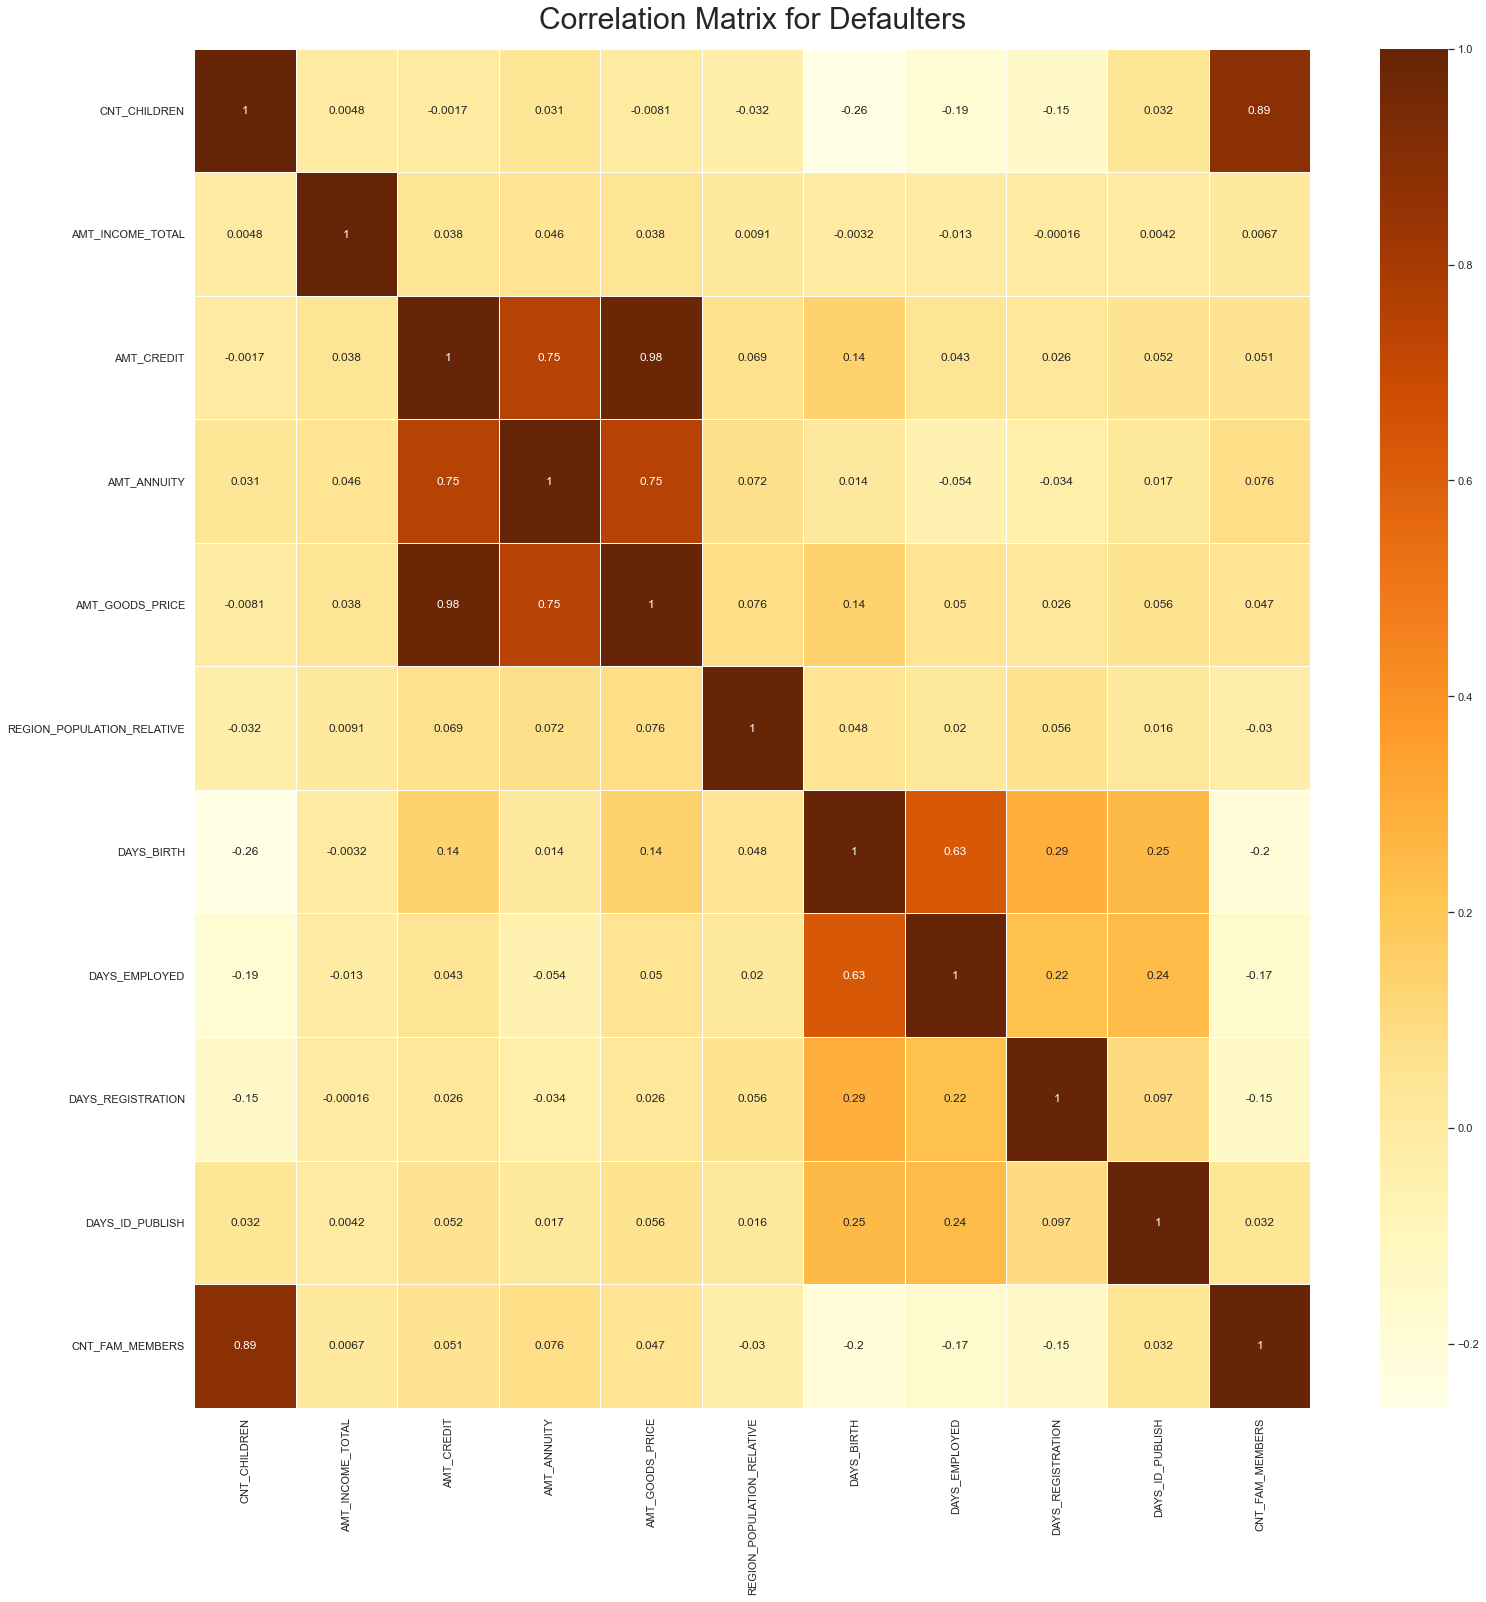

In [322]:
plt.figure(figsize=(25,25))
sns.heatmap(target1_corr, annot=True, cmap="YlOrBr", linewidth=1)
plt.title("Correlation Matrix for Defaulters",fontsize=30, pad=20)
plt.show()           
            

#### Insights:
    
- AMT_CREDIT is highly correlated with AMT_INCOME_TOTAL, AMT_ANNUITY and AMT_GOODS_PRICE for both defaulters and non-defaulters.
- There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters.
- Days_birth and number of children correlation has reduced in defaulters when compared to non-defaulters.
- But the AMT Annuity correlation with AMT credit has slightly reduced in defaulters when compared to non-defaulters.

# Previous Application Dataset Analysis

In [323]:
Prev_ApplData=pd.read_csv("previous_application.csv")

In [324]:
Prev_ApplData.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [326]:
Prev_ApplData.shape

(1670214, 37)

In [327]:
Prev_ApplData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [328]:
Prev_ApplData.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [329]:
Prev_ApplData.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [330]:
prev_null=Prev_ApplData.isnull().mean()*100
prev_null[prev_null>0].count()

16

In [331]:
prev_null[prev_null>40].count()

11

In [332]:
# Drop all columns with more than 40% null values and copy in Prev1_ApplData dataframe

Prev1_ApplData = Prev_ApplData.loc[:,Prev_ApplData.isnull().mean()*100<=40]
Prev1_ApplData.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [333]:
Prev1_ApplData.shape

(1670214, 26)

In [334]:
Prev1_ApplData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [346]:
Prev1_ApplData.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_CREDIT                       1
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                      0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [347]:
Prev1_ApplData.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

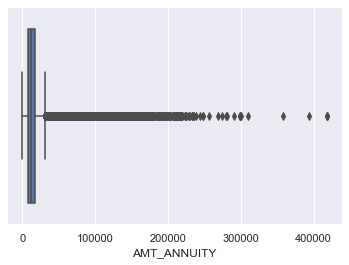

In [348]:
sns.boxplot(Prev1_ApplData["AMT_ANNUITY"])
plt.show()

In [349]:
# Replacing the missing value with median

Prev1_ApplData.AMT_ANNUITY.describe()

count    1.670214e+06
mean     1.490651e+04
std      1.317751e+04
min      0.000000e+00
25%      7.547096e+03
50%      1.125000e+04
75%      1.682403e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [350]:
Prev1_ApplData.AMT_ANNUITY.fillna(Prev1_ApplData.AMT_ANNUITY.median(), inplace = True)

In [351]:
Prev1_ApplData.AMT_ANNUITY.isnull().sum()

0

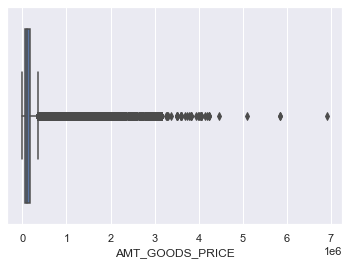

In [352]:
# Replacing the missing value with median

sns.boxplot(Prev1_ApplData["AMT_GOODS_PRICE"])
plt.show()

In [353]:
Prev1_ApplData.AMT_GOODS_PRICE.fillna(Prev1_ApplData.AMT_GOODS_PRICE.median(), inplace=True)

In [354]:
Prev1_ApplData.AMT_GOODS_PRICE.isnull().sum()

0

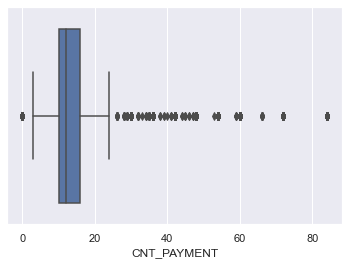

In [355]:
sns.boxplot(Prev1_ApplData["CNT_PAYMENT"])
plt.show()

In [356]:
# Replacing the missing value with median

Prev1_ApplData.CNT_PAYMENT.fillna(Prev1_ApplData.CNT_PAYMENT.median(), inplace=True)

In [357]:
Prev1_ApplData.CNT_PAYMENT.isnull().sum()

0

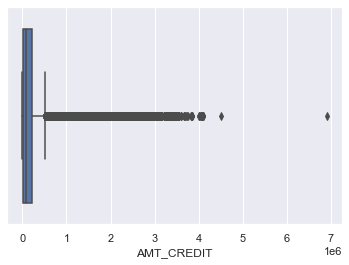

In [358]:
sns.boxplot(Prev1_ApplData["AMT_CREDIT"])
plt.show()

In [359]:
# Replacing the missing value with median

Prev1_ApplData.AMT_CREDIT.fillna(Prev1_ApplData.AMT_CREDIT.median(), inplace=True)

In [360]:
Prev1_ApplData.AMT_CREDIT.isnull().sum()

0

In [361]:
# Replacing the missing value with mode

Prev1_ApplData.PRODUCT_COMBINATION.mode()[0]

'Cash'

In [362]:
Prev1_ApplData.PRODUCT_COMBINATION.fillna(Prev1_ApplData.PRODUCT_COMBINATION.mode()[0], inplace=True)

In [363]:
Prev1_ApplData.PRODUCT_COMBINATION.isnull().sum()

0

In [364]:
Prev1_ApplData.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [365]:
Prev1_ApplData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670214 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

#### Removing the column values of 'XNA' and 'XAP'

In [369]:
Prev1_ApplData=Prev1_ApplData.drop(Prev1_ApplData[Prev1_ApplData['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
Prev1_ApplData=Prev1_ApplData.drop(Prev1_ApplData[Prev1_ApplData['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
Prev1_ApplData=Prev1_ApplData.drop(Prev1_ApplData[Prev1_ApplData['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [370]:
Prev1_ApplData["NAME_CASH_LOAN_PURPOSE"].value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

In [371]:
Prev1_ApplData.shape

(69635, 26)

#### Merging of the two dataframes Application and previous application dataset.

merged_data=pd.merge(left=New_ApplData, right=Prev1_ApplData, how='inner', on='SK_ID_CURR', suffixes='_x')

In [373]:
merged_data.head(1)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER FLAG_OWN_CAR  \
0      100034       0     Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY_  \
0               Y             0           90000.0     180000.0        9000.0   

   AMT_GOODS_PRICE_ NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0          180000.0   Unaccompanied          Working    Higher education   

     NAME_FAMILY_STATUS NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married      With parents                    0.030755   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0          28         1010.0             4799.0             3015   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START_  \
0        Laborers              1.0                     TUESDAY   

   HOUR_APPR_PROCESS_START_  REG_REGION_NOT_LIVE_REGION  \
0                        16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.502779      0.510853   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       0.0                       0.0                   599.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_TYPE  \
0                        0.0                         1.0        VERY LOW   

  AMT_CREDIT_TYPE AGE_GROUP  SK_ID_PREV NAME_CONTRACT_TYPEx  AMT_ANNUITYx  \
0        VERY LOW     Young     1390369          Cash loans      22430.43   

   AMT_APPLICATION  AMT_CREDITx  AMT_GOODS_PRICEx WEEKDAY_APPR_PROCESS_STARTx  \
0          94500.0     109971.0           94500.0                      FRIDAY   

   HOUR_APPR_PROCESS_STARTx FLAG_LAST_APPL_PER_CONTRACT  \
0                        11                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                  Other             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0           -599  Cash through the bank                XAP              New   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION  
0          6.0             high   Cash Street: high

In [374]:
merged_data = merged_data.rename({'NAME_CONTRACT_TYPE_':'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY','AMT_GOODS_PRICE_':'AMT_GOODS_PRICE','WEEKDAY_APPR_PROCESS_START_':'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV','AMT_GOODS_PRICEx':'AMT_GOODS_PRICE_PREV','WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [375]:
merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100034       0    Revolving loans           M            N   
1      100035       0         Cash loans           F            N   
2      100039       0         Cash loans           M            Y   
3      100046       0    Revolving loans           M            Y   
4      100046       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0           90000.0    180000.0       9000.0   
1               Y             0          292500.0    665892.0      24592.5   
2               N             1          360000.0    733315.5      39069.0   
3               Y             0          180000.0    540000.0      27000.0   
4               Y             0          180000.0    540000.0      27000.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         180000.0   Unaccompanied               Working   
1         477000.0   Unaccompanied  Commercial associate   
2         679500.0   Unaccompanied  Commercial associate   
3         540000.0   Unaccompanied               Working   
4         540000.0   Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education  Single / not married       With parents   
1  Secondary / secondary special        Civil marriage  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.030755          28         1010.0             4799.0   
1                    0.025164          41         2668.0             5266.0   
2                    0.015221          32         2060.0             3557.0   
3                    0.025164          44         1761.0             8236.0   
4                    0.025164          44         1761.0             8236.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3015        Laborers              1.0   
1             3787        Laborers              2.0   
2             3557         Drivers              3.0   
3             4292        Managers              2.0   
4             4292        Managers              2.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                    TUESDAY                       16   
1                  WEDNESDAY                       13   
2                   THURSDAY                       10   
3                    TUESDAY                        8   
4                    TUESDAY                        8   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       1   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0  Business Entity Type 3   
2                       1                        0           Self-employed   
3                       0                        0  Business Entity Type 3   
4                       0               

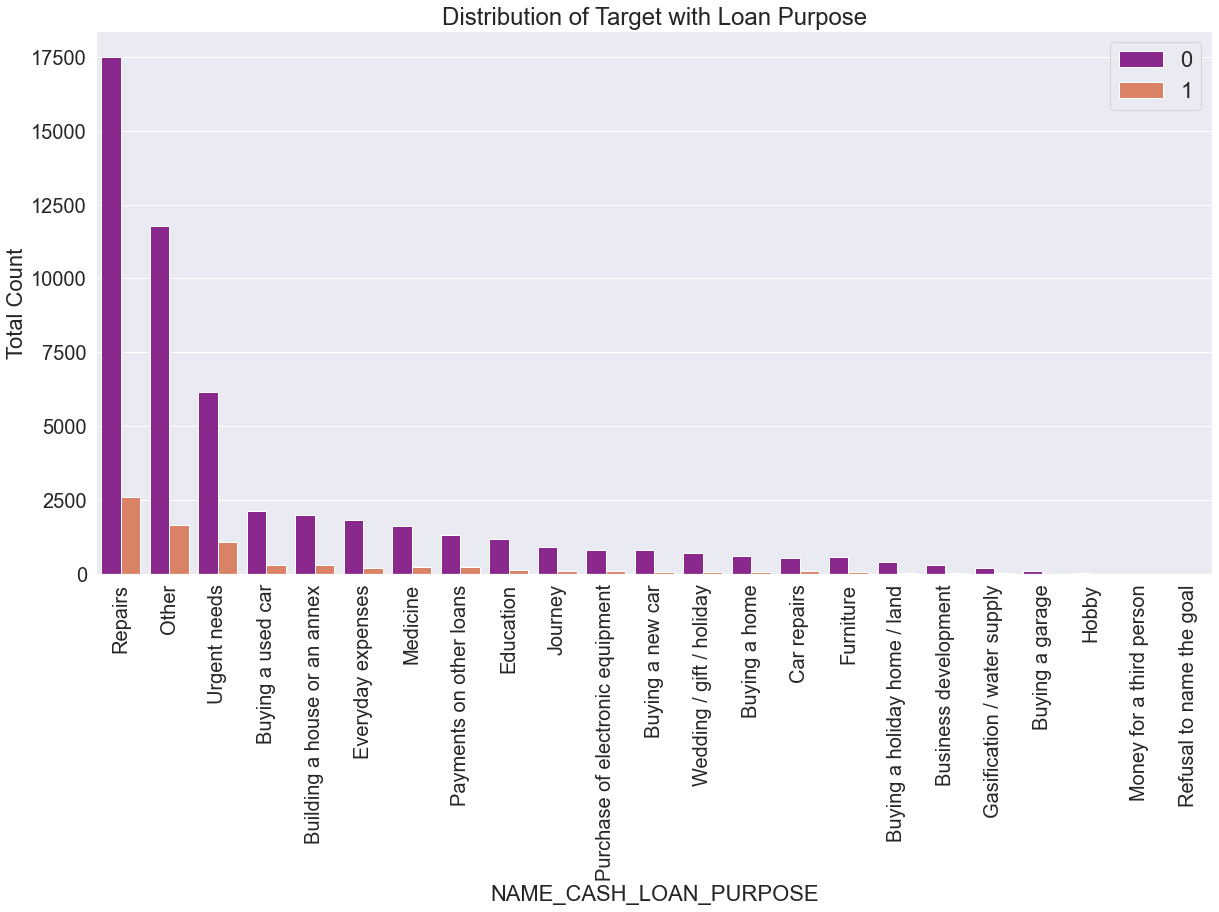

In [376]:
# TARGET with NAME_CASH_LOAN_PURPOSE

plt.figure(figsize=(20,10))

sns.countplot(data = merged_data, x= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue = 'TARGET', palette='plasma') 
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("NAME_CASH_LOAN_PURPOSE", fontsize=22)
plt.ylabel("Total Count", fontsize=22)
plt.title('Distribution of Target with Loan Purpose', fontsize=24)
plt.legend(fontsize=22)
plt.show()

Insights:

- Loan purposes with 'Repairs' are having more difficulites in paying on time when compared to others.
- There is high number of clients having difficulties for repaying the loan amount under 'Medicine' when compared to "Education".
- 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' are showing less paying difficulties. Hence Bank can focus on these areas.

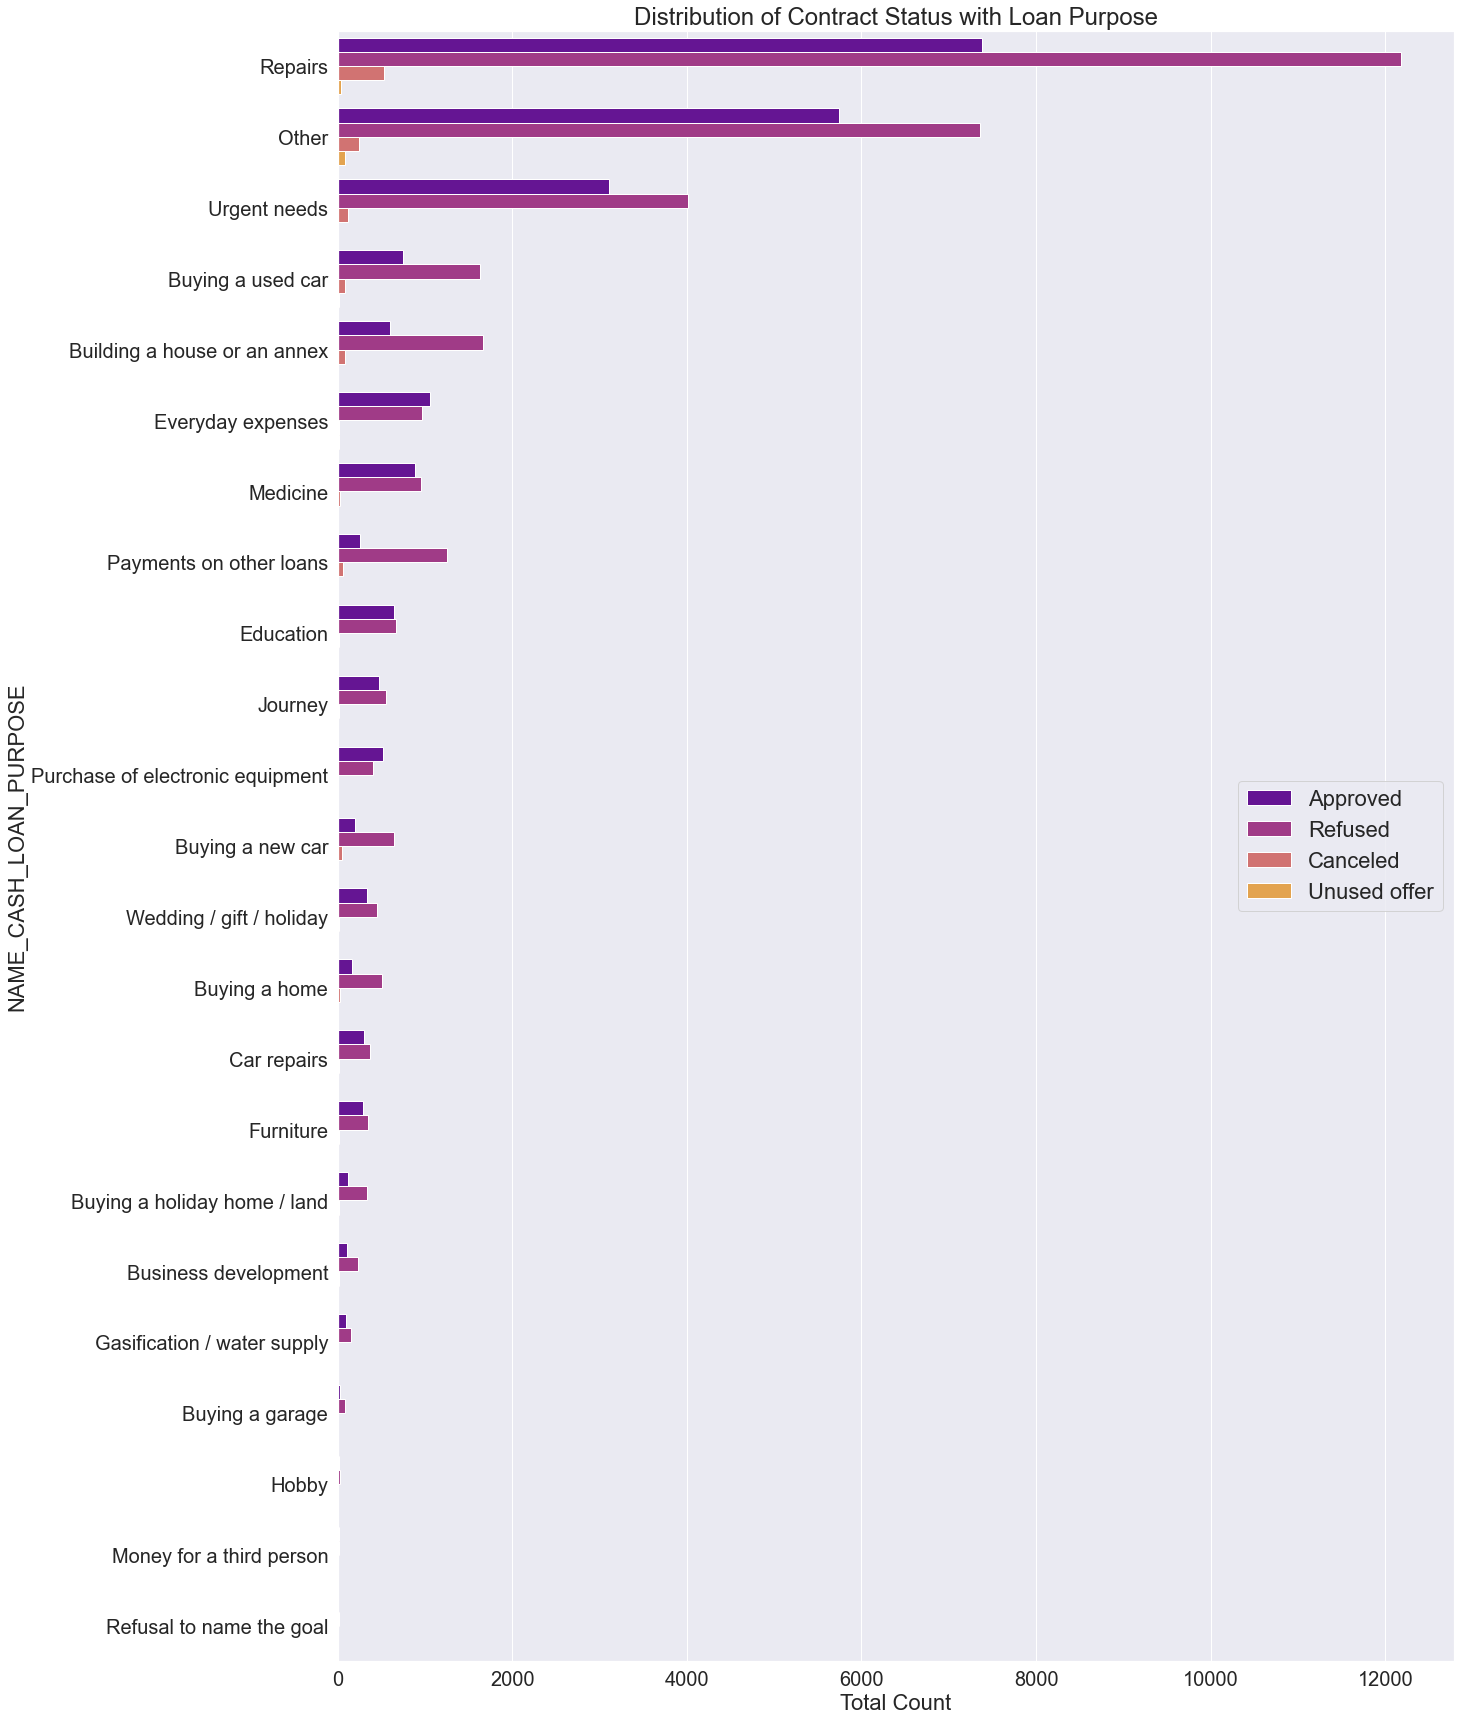

In [377]:
# NAME_CONTRACT_STATUS with NAME_CASH_LOAN_PURPOSE

plt.figure(figsize=(20,30))
sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue = 'NAME_CONTRACT_STATUS', palette='plasma') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Total Count", fontsize=22)
plt.ylabel("NAME_CASH_LOAN_PURPOSE", fontsize=22)
plt.title('Distribution of Contract Status with Loan Purpose', fontsize=24)
plt.legend(fontsize=22)
plt.show()

Insights:
    
- The maximum refusal of loan comes for the purpose "Repair".
- Education has equal number of approval and rejection.
- Buying a new car, payment on other loans, building a house has more rejections than approval. 

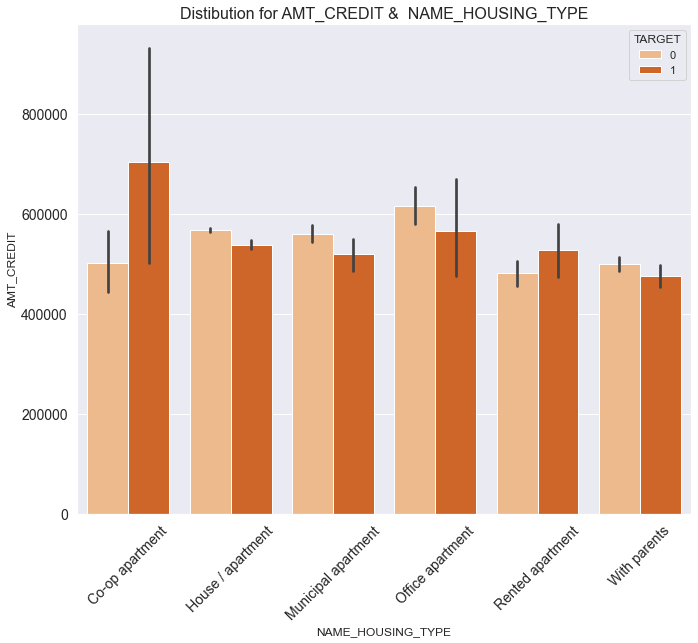

In [378]:
# AMT_CREDIT and NAME_HOUSING_TYPE

plt.figure(figsize=(11,9))
sns.barplot(data =merged_data, x='NAME_HOUSING_TYPE', hue='TARGET', y='AMT_CREDIT', palette='Oranges')
plt.title("Distibution for AMT_CREDIT &  NAME_HOUSING_TYPE", fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=360)
plt.show()

Insights:
    
- The housing type 'Co-op apartment' has more clients having payment difficulties. So bank avoid giving loans to this housing type.
- Also bank should give loans for the housing type category with parents or Municipal apartment as the clients having payment difficulties are less.

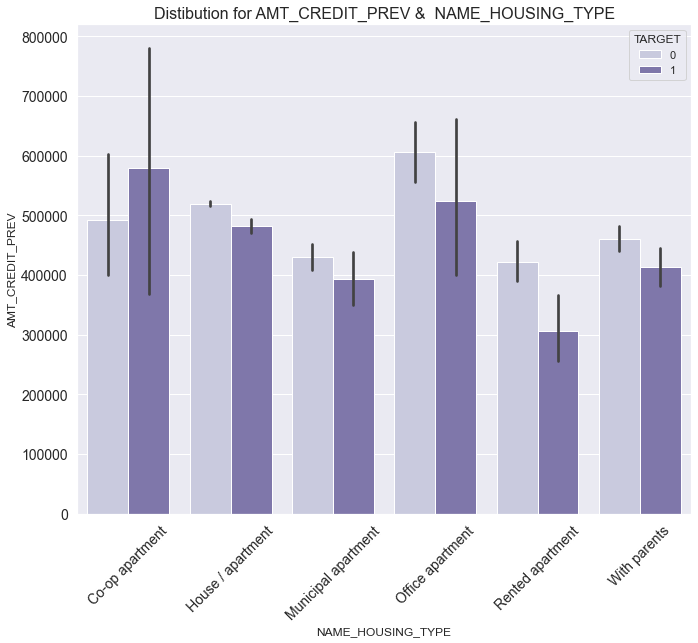

In [379]:
# AMT_CREDIT_PREV and NAME_HOUSING_TYPE

plt.figure(figsize=(11,9))
sns.barplot(data =merged_data, x='NAME_HOUSING_TYPE', hue='TARGET', y='AMT_CREDIT_PREV', palette='Purples')
plt.title("Distibution for AMT_CREDIT_PREV &  NAME_HOUSING_TYPE", fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=360)
plt.show()

Insights:

- In the previous application the housing type 'Co-op apartment' had more clients having payment difficulties and same as current application.
- Also people who are in Rented apartment are the ones having less payment difficulties.
- The highest people who did not had payment difficulty come under the housing type Office apartment.

## CONCLUSION

Below are the final insights which was derived on the basis of analysis done for current and previous application datasets.

- NAME_EDUCATION_TYPE: Academic degree has less defaults. People with Lower Secondary & Secondary education more to default.
- NAME_INCOME_TYPE: Student and Businessmen have no defaults. Bank should avoid giving loans to income type Working as they are the one having most unsuccessful payments.
- CNT_CHILDREN: People with zero to two children are able to repay the loans.  Client who have children equal to or more than 9 have high default rate.
- AMT_INCOME_TOTAL: Applicant with Income more than 700,000 are less likely to default.
- DAYS_BIRTH: Very young and people above age of 50 has less default. Avoid young people who are in age group of 20-40 as they have higher probability of defaulting
- OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.
- NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed are at high risk to default.
- ORGANIZATION_TYPE: Self-employed people have relative high defaulting rate
- NAME_HOUSING_TYPE: Bank should approach the client who have the housing type as With parents.
- CODE_GENDER: Men are at high default rate.
- NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly. Since the Loan purpose of 'Repair' has the highest number of payment difficulties bank should avoid providing loans to this category.
- NAME_FAMILY_STATUS : Widows, seperated default a lot.
- DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.
    